In [1]:
# Import necessary libraries
import os, sys
import numpy as np
import pandas as pd
import itertools
from collections import defaultdict
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Inits

In [2]:
# Get the current working directory
base_dir = os.getcwd()
plots_folder = 'plots'

# Load functions from other notebooks
helpers_file = os.path.join(base_dir, 'helpers.ipynb')
%run $helpers_file

current_module = sys.modules[__name__]

class Strategies:
    """
    A class representing different strategies for counterfactual explanation generation.

    Attributes:
    - stypes (list): List of strategy types, including 'random', 'brute_force', 'bfs_yloss', 'bidirectional', and 'combo'.
    """
    stypes = [
        'random',
        'brute_force',
        'bfs_yloss',
        'bidirectional',
        'combo',
    ]

# Movielens 10M

## Load data

In [6]:
## uncomment the following lines if you want to run the various strategies in budget_strategies
implemented_strategies = os.path.join(base_dir, 'clean_budget_strategies.ipynb')
%run $implemented_strategies

# Restore relevant variables from other notebooks

%store -r random_cfs
%store -r brute_force_cfs
%store -r bfs_yloss_cfs
# %store -r dfs_yloss_cfs
# %store -r bestfs_yloss_cfs
%store -r bidirectional_cfs
%store -r combo_cfs

  0%|          | 0/6041 [00:00<?, ?it/s]

[1. 0. 0. ... 0. 0. 0.]
[0.00000000e+00 1.00000000e+00 1.03482099e-01 ... 0.00000000e+00
 5.79710145e-04 0.00000000e+00]
(3707,)
(3707,)
6040
1
6041
3706
1
3707


target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: Random


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3474 3473 3472 3467 3463 3462 3460 3458 3454 3451 3449 3448 3444
 3441 3435 3429 3427 3476 3477]
find_best_jaccard top items : [1, 3495, 3494, 3493, 3488, 3484, 3483, 3481, 3479, 3475, 3472, 3470, 3469, 3465, 3462, 3456, 3450, 3448, 3497, 3498]
top [   0 3445 3444 3443 3441 3431 3427 3425 3416 3413 3448 3399 3393 3390
 3388 3379 3378 3377 3372 3365]
find_best_jaccard top items : [1, 3466, 3465, 3464, 3462, 3452, 3448, 3446, 3437, 3434, 3469, 3420, 3414, 3411, 3409, 3400, 3399, 3398, 3393, 3386]
top [   0 3481 3482 3483 3484 3485 3487 3488 3489 3491 3493 3494 3495 3497
 3498 3499 3502 3503 3507 3508]
find_best_jaccard top items : [1, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3510, 3512, 3514, 3515, 3516, 3518, 3519, 3520, 3523, 3524, 3528, 3529]
top [   0 3463 3472 3528 3536 3537 3546 3548 3416 3549 3551 3558 3563 3564
 3566 3571 3572 3550 3379 3378]
find_best_jaccard top items : [1, 3484, 3493, 3549, 3557, 3558, 3567, 3569, 3437, 3570, 3572, 3579, 3584, 3585, 3587, 3592, 3593

target position loop: 20it [00:11,  1.80it/s]              

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3468 3473 3476 3477 3481 3482 3483 3484 3487 3488 3489 3491 3493
 3467 3494 3496 3497 3498 3499]
find_best_jaccard top items : [1, 3489, 3494, 3497, 3498, 3502, 3503, 3504, 3505, 3508, 3509, 3510, 3512, 3514, 3488, 3515, 3517, 3518, 3519, 3520]
top [   0 3434 3431 3429 3421 3417 3416 3409 3372 3369 3360 3356 3334 3330
 3323 3320 3317 3312 3308 3304]
find_best_jaccard top items : [1, 3455, 3452, 3450, 3442, 3438, 3437, 3430, 3393, 3390, 3381, 3377, 3355, 3351, 3344, 3341, 3338, 3333, 3329, 3325]
top [   0 3456 3467 3469 3473 3475 3476 3477 3481 3482 3483 3484 3485 3487
 3488 3455 3489 3493 3494 3495]
find_best_jaccard top items : [1, 3477, 3488, 3490, 3494, 3496, 3497, 3498, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3476, 3510, 3514, 3515, 3516]
top [   0 3581 3580 3572 3571 3558 3551 3537 3536 3528 3463 3443 3583 3379
 3369 3360 3356 3320 3317 3267]
find_best_jaccard top items : [1, 3602, 3601, 3593, 3592, 3579, 3572, 3558, 3557, 3549, 3484, 3464, 3604, 3400, 3390, 3381, 3377

target position loop: 30it [00:21,  1.31it/s]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3454 3451 3449 3448 3445 3444 3443 3441 3425 3455 3416 3409 3372
 3369 3365 3360 3358 3350 3337]
find_best_jaccard top items : [1, 3475, 3472, 3470, 3469, 3466, 3465, 3464, 3462, 3446, 3476, 3437, 3430, 3393, 3390, 3386, 3381, 3379, 3371, 3358]
top [   0 3431 3429 3427 3425 3419 3417 3416 3413 3412 3375 3372 3441 3369
 3358 3356 3350 3337 3330 3328]
find_best_jaccard top items : [1, 3452, 3450, 3448, 3446, 3440, 3438, 3437, 3434, 3433, 3396, 3393, 3462, 3390, 3379, 3377, 3371, 3358, 3351, 3349]
top [   0 3487 3486 3485 3484 3483 3482 3481 3477 3476 3473 3469 3467 3463
 3460 3456 3488 3449 3489 3493]
find_best_jaccard top items : [1, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3498, 3497, 3494, 3490, 3488, 3484, 3481, 3477, 3509, 3470, 3510, 3514]
top [   0 3472 3527 3528 3536 3537 3551 3456 3557 3566 3571 3572 3577 3578
 3580 3558 3582 3449 3379 2990]
find_best_jaccard top items : [1, 3493, 3548, 3549, 3557, 3558, 3572, 3477, 3578, 3587, 3592, 3593, 3598, 3599, 3601, 3579, 3603

target position loop: 40it [00:31,  1.16it/s]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3462 3456 3455 3451 3449 3448 3445 3444 3441 3434 3431 3427 3416
 3401 3399 3396 3394 3463 3467]
find_best_jaccard top items : [1, 3483, 3477, 3476, 3472, 3470, 3469, 3466, 3465, 3462, 3455, 3452, 3448, 3437, 3422, 3420, 3417, 3415, 3484, 3488]
top [   0 3372 3369 3368 3365 3360 3356 3350 3337 3334 3330 3328 3324 3320
 3317 3375 3315 3302 3299 3289]
find_best_jaccard top items : [1, 3393, 3390, 3389, 3386, 3381, 3377, 3371, 3358, 3355, 3351, 3349, 3345, 3341, 3338, 3396, 3336, 3323, 3320, 3310]
top [   0 3507 3503 3499 3498 3497 3496 3495 3494 3493 3491 3489 3488 3487
 3485 3484 3483 3482 3477 3476]
find_best_jaccard top items : [1, 3528, 3524, 3520, 3519, 3518, 3517, 3516, 3515, 3514, 3512, 3510, 3509, 3508, 3506, 3505, 3504, 3503, 3498, 3497]
top [   0 3454 3456 3463 3472 3528 3529 3536 3537 3548 3549 3553 3554 3557
 3558 3560 3566 3571 3444 3431]
find_best_jaccard top items : [1, 3475, 3477, 3484, 3493, 3549, 3550, 3557, 3558, 3569, 3570, 3574, 3575, 3578, 3579, 3581, 3587

target position loop: 40it [00:42,  1.06s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

Stored 'random_cfs' (list)
The backend used is: BFS


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3474 3473 3472 3467 3463 3462 3460 3458 3454 3451 3449 3448 3444
 3441 3435 3429 3427 3476 3477]
find_best_jaccard top items : [1, 3495, 3494, 3493, 3488, 3484, 3483, 3481, 3479, 3475, 3472, 3470, 3469, 3465, 3462, 3456, 3450, 3448, 3497, 3498]
top [   0 3445 3444 3443 3441 3431 3427 3425 3416 3413 3448 3399 3393 3390
 3388 3379 3378 3377 3372 3365]
find_best_jaccard top items : [1, 3466, 3465, 3464, 3462, 3452, 3448, 3446, 3437, 3434, 3469, 3420, 3414, 3411, 3409, 3400, 3399, 3398, 3393, 3386]
top [   0 3481 3482 3483 3484 3485 3487 3488 3489 3491 3493 3494 3495 3497
 3498 3499 3502 3503 3507 3508]
find_best_jaccard top items : [1, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3510, 3512, 3514, 3515, 3516, 3518, 3519, 3520, 3523, 3524, 3528, 3529]


target position loop: 20it [00:00, 57.82it/s]              

top [   0 3463 3472 3528 3536 3537 3546 3548 3416 3549 3551 3558 3563 3564
 3566 3571 3572 3550 3379 3378]
find_best_jaccard top items : [1, 3484, 3493, 3549, 3557, 3558, 3567, 3569, 3437, 3570, 3572, 3579, 3584, 3585, 3587, 3592, 3593, 3571, 3400, 3399]


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3468 3473 3476 3477 3481 3482 3483 3484 3487 3488 3489 3491 3493
 3467 3494 3496 3497 3498 3499]
find_best_jaccard top items : [1, 3489, 3494, 3497, 3498, 3502, 3503, 3504, 3505, 3508, 3509, 3510, 3512, 3514, 3488, 3515, 3517, 3518, 3519, 3520]
top [   0 3434 3431 3429 3421 3417 3416 3409 3372 3369 3360 3356 3334 3330
 3323 3320 3317 3312 3308 3304]
find_best_jaccard top items : [1, 3455, 3452, 3450, 3442, 3438, 3437, 3430, 3393, 3390, 3381, 3377, 3355, 3351, 3344, 3341, 3338, 3333, 3329, 3325]
top [   0 3456 3467 3469 3473 3475 3476 3477 3481 3482 3483 3484 3485 3487
 3488 3455 3489 3493 3494 3495]
find_best_jaccard top items : [1, 3477, 3488, 3490, 3494, 3496, 3497, 3498, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3476, 3510, 3514, 3515, 3516]


target position loop: 30it [00:01, 25.16it/s]

top [   0 3581 3580 3572 3571 3558 3551 3537 3536 3528 3463 3443 3583 3379
 3369 3360 3356 3320 3317 3267]
find_best_jaccard top items : [1, 3602, 3601, 3593, 3592, 3579, 3572, 3558, 3557, 3549, 3484, 3464, 3604, 3400, 3390, 3381, 3377, 3341, 3338, 3288]


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3454 3451 3449 3448 3445 3444 3443 3441 3425 3455 3416 3409 3372
 3369 3365 3360 3358 3350 3337]
find_best_jaccard top items : [1, 3475, 3472, 3470, 3469, 3466, 3465, 3464, 3462, 3446, 3476, 3437, 3430, 3393, 3390, 3386, 3381, 3379, 3371, 3358]
top [   0 3431 3429 3427 3425 3419 3417 3416 3413 3412 3375 3372 3441 3369
 3358 3356 3350 3337 3330 3328]
find_best_jaccard top items : [1, 3452, 3450, 3448, 3446, 3440, 3438, 3437, 3434, 3433, 3396, 3393, 3462, 3390, 3379, 3377, 3371, 3358, 3351, 3349]
top [   0 3487 3486 3485 3484 3483 3482 3481 3477 3476 3473 3469 3467 3463
 3460 3456 3488 3449 3489 3493]
find_best_jaccard top items : [1, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3498, 3497, 3494, 3490, 3488, 3484, 3481, 3477, 3509, 3470, 3510, 3514]


target position loop: 40it [00:01, 20.68it/s]

top [   0 3472 3527 3528 3536 3537 3551 3456 3557 3566 3571 3572 3577 3578
 3580 3558 3582 3449 3379 2990]
find_best_jaccard top items : [1, 3493, 3548, 3549, 3557, 3558, 3572, 3477, 3578, 3587, 3592, 3593, 3598, 3599, 3601, 3579, 3603, 3470, 3400, 3011]


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3462 3456 3455 3451 3449 3448 3445 3444 3441 3434 3431 3427 3416
 3401 3399 3396 3394 3463 3467]
find_best_jaccard top items : [1, 3483, 3477, 3476, 3472, 3470, 3469, 3466, 3465, 3462, 3455, 3452, 3448, 3437, 3422, 3420, 3417, 3415, 3484, 3488]
top [   0 3372 3369 3368 3365 3360 3356 3350 3337 3334 3330 3328 3324 3320
 3317 3375 3315 3302 3299 3289]
find_best_jaccard top items : [1, 3393, 3390, 3389, 3386, 3381, 3377, 3371, 3358, 3355, 3351, 3349, 3345, 3341, 3338, 3396, 3336, 3323, 3320, 3310]
top [   0 3507 3503 3499 3498 3497 3496 3495 3494 3493 3491 3489 3488 3487
 3485 3484 3483 3482 3477 3476]
find_best_jaccard top items : [1, 3528, 3524, 3520, 3519, 3518, 3517, 3516, 3515, 3514, 3512, 3510, 3509, 3508, 3506, 3505, 3504, 3503, 3498, 3497]


target position loop: 40it [00:02, 17.89it/s]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

top [   0 3454 3456 3463 3472 3528 3529 3536 3537 3548 3549 3553 3554 3557
 3558 3560 3566 3571 3444 3431]
find_best_jaccard top items : [1, 3475, 3477, 3484, 3493, 3549, 3550, 3557, 3558, 3569, 3570, 3574, 3575, 3578, 3579, 3581, 3587, 3592, 3465, 3452]
The backend used is: BFS


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3474 3473 3472 3467 3463 3462 3460 3458 3454 3451 3449 3448 3444
 3441 3435 3429 3427 3476 3477]
find_best_jaccard top items : [1, 3495, 3494, 3493, 3488, 3484, 3483, 3481, 3479, 3475, 3472, 3470, 3469, 3465, 3462, 3456, 3450, 3448, 3497, 3498]
top [   0 3445 3444 3443 3441 3431 3427 3425 3416 3413 3448 3399 3393 3390
 3388 3379 3378 3377 3372 3365]
find_best_jaccard top items : [1, 3466, 3465, 3464, 3462, 3452, 3448, 3446, 3437, 3434, 3469, 3420, 3414, 3411, 3409, 3400, 3399, 3398, 3393, 3386]
top [   0 3481 3482 3483 3484 3485 3487 3488 3489 3491 3493 3494 3495 3497
 3498 3499 3502 3503 3507 3508]
find_best_jaccard top items : [1, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3510, 3512, 3514, 3515, 3516, 3518, 3519, 3520, 3523, 3524, 3528, 3529]


target position loop: 20it [00:00, 51.30it/s]              

top [   0 3463 3472 3528 3536 3537 3546 3548 3416 3549 3551 3558 3563 3564
 3566 3571 3572 3550 3379 3378]
find_best_jaccard top items : [1, 3484, 3493, 3549, 3557, 3558, 3567, 3569, 3437, 3570, 3572, 3579, 3584, 3585, 3587, 3592, 3593, 3571, 3400, 3399]


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3468 3473 3476 3477 3481 3482 3483 3484 3487 3488 3489 3491 3493
 3467 3494 3496 3497 3498 3499]
find_best_jaccard top items : [1, 3489, 3494, 3497, 3498, 3502, 3503, 3504, 3505, 3508, 3509, 3510, 3512, 3514, 3488, 3515, 3517, 3518, 3519, 3520]
top [   0 3434 3431 3429 3421 3417 3416 3409 3372 3369 3360 3356 3334 3330
 3323 3320 3317 3312 3308 3304]
find_best_jaccard top items : [1, 3455, 3452, 3450, 3442, 3438, 3437, 3430, 3393, 3390, 3381, 3377, 3355, 3351, 3344, 3341, 3338, 3333, 3329, 3325]
top [   0 3456 3467 3469 3473 3475 3476 3477 3481 3482 3483 3484 3485 3487
 3488 3455 3489 3493 3494 3495]
find_best_jaccard top items : [1, 3477, 3488, 3490, 3494, 3496, 3497, 3498, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3476, 3510, 3514, 3515, 3516]
top [   0 3581 3580 3572 3571 3558 3551 3537 3536 3528 3463 3443 3583 3379
 3369 3360 3356 3320 3317 3267]
find_best_jaccard top items : [1, 3602, 3601, 3593, 3592, 3579, 3572, 3558, 3557, 3549, 3484, 3464, 3604, 3400, 3390, 3381, 3377

target position loop: 30it [00:00, 36.43it/s]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3454 3451 3449 3448 3445 3444 3443 3441 3425 3455 3416 3409 3372
 3369 3365 3360 3358 3350 3337]
find_best_jaccard top items : [1, 3475, 3472, 3470, 3469, 3466, 3465, 3464, 3462, 3446, 3476, 3437, 3430, 3393, 3390, 3386, 3381, 3379, 3371, 3358]
top [   0 3431 3429 3427 3425 3419 3417 3416 3413 3412 3375 3372 3441 3369
 3358 3356 3350 3337 3330 3328]
find_best_jaccard top items : [1, 3452, 3450, 3448, 3446, 3440, 3438, 3437, 3434, 3433, 3396, 3393, 3462, 3390, 3379, 3377, 3371, 3358, 3351, 3349]
top [   0 3487 3486 3485 3484 3483 3482 3481 3477 3476 3473 3469 3467 3463
 3460 3456 3488 3449 3489 3493]
find_best_jaccard top items : [1, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3498, 3497, 3494, 3490, 3488, 3484, 3481, 3477, 3509, 3470, 3510, 3514]


target position loop: 40it [00:01, 27.95it/s]

top [   0 3472 3527 3528 3536 3537 3551 3456 3557 3566 3571 3572 3577 3578
 3580 3558 3582 3449 3379 2990]
find_best_jaccard top items : [1, 3493, 3548, 3549, 3557, 3558, 3572, 3477, 3578, 3587, 3592, 3593, 3598, 3599, 3601, 3579, 3603, 3470, 3400, 3011]


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3462 3456 3455 3451 3449 3448 3445 3444 3441 3434 3431 3427 3416
 3401 3399 3396 3394 3463 3467]
find_best_jaccard top items : [1, 3483, 3477, 3476, 3472, 3470, 3469, 3466, 3465, 3462, 3455, 3452, 3448, 3437, 3422, 3420, 3417, 3415, 3484, 3488]
top [   0 3372 3369 3368 3365 3360 3356 3350 3337 3334 3330 3328 3324 3320
 3317 3375 3315 3302 3299 3289]
find_best_jaccard top items : [1, 3393, 3390, 3389, 3386, 3381, 3377, 3371, 3358, 3355, 3351, 3349, 3345, 3341, 3338, 3396, 3336, 3323, 3320, 3310]
top [   0 3507 3503 3499 3498 3497 3496 3495 3494 3493 3491 3489 3488 3487
 3485 3484 3483 3482 3477 3476]
find_best_jaccard top items : [1, 3528, 3524, 3520, 3519, 3518, 3517, 3516, 3515, 3514, 3512, 3510, 3509, 3508, 3506, 3505, 3504, 3503, 3498, 3497]
top [   0 3454 3456 3463 3472 3528 3529 3536 3537 3548 3549 3553 3554 3557
 3558 3560 3566 3571 3444 3431]
find_best_jaccard top items : [1, 3475, 3477, 3484, 3493, 3549, 3550, 3557, 3558, 3569, 3570, 3574, 3575, 3578, 3579, 3581, 3587

target position loop: 40it [00:01, 25.04it/s]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

Stored 'bfs_yloss_cfs' (list)
The backend used is: BiDirectional


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3474 3473 3472 3467 3463 3462 3460 3458 3454 3451 3449 3448 3444
 3441 3435 3429 3427 3476 3477]
find_best_jaccard top items : [1, 3495, 3494, 3493, 3488, 3484, 3483, 3481, 3479, 3475, 3472, 3470, 3469, 3465, 3462, 3456, 3450, 3448, 3497, 3498]
top [   0 3445 3444 3443 3441 3431 3427 3425 3416 3413 3448 3399 3393 3390
 3388 3379 3378 3377 3372 3365]
find_best_jaccard top items : [1, 3466, 3465, 3464, 3462, 3452, 3448, 3446, 3437, 3434, 3469, 3420, 3414, 3411, 3409, 3400, 3399, 3398, 3393, 3386]
top [   0 3481 3482 3483 3484 3485 3487 3488 3489 3491 3493 3494 3495 3497
 3498 3499 3502 3503 3507 3508]
find_best_jaccard top items : [1, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3510, 3512, 3514, 3515, 3516, 3518, 3519, 3520, 3523, 3524, 3528, 3529]
top [   0 3463 3472 3528 3536 3537 3546 3548 3416 3549 3551 3558 3563 3564
 3566 3571 3572 3550 3379 3378]
find_best_jaccard top items : [1, 3484, 3493, 3549, 3557, 3558, 3567, 3569, 3437, 3570, 3572, 3579, 3584, 3585, 3587, 3592, 3593

target position loop: 20it [00:15,  1.27it/s]              

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3468 3473 3476 3477 3481 3482 3483 3484 3487 3488 3489 3491 3493
 3467 3494 3496 3497 3498 3499]
find_best_jaccard top items : [1, 3489, 3494, 3497, 3498, 3502, 3503, 3504, 3505, 3508, 3509, 3510, 3512, 3514, 3488, 3515, 3517, 3518, 3519, 3520]
top [   0 3434 3431 3429 3421 3417 3416 3409 3372 3369 3360 3356 3334 3330
 3323 3320 3317 3312 3308 3304]
find_best_jaccard top items : [1, 3455, 3452, 3450, 3442, 3438, 3437, 3430, 3393, 3390, 3381, 3377, 3355, 3351, 3344, 3341, 3338, 3333, 3329, 3325]
top [   0 3456 3467 3469 3473 3475 3476 3477 3481 3482 3483 3484 3485 3487
 3488 3455 3489 3493 3494 3495]
find_best_jaccard top items : [1, 3477, 3488, 3490, 3494, 3496, 3497, 3498, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3476, 3510, 3514, 3515, 3516]
top [   0 3581 3580 3572 3571 3558 3551 3537 3536 3528 3463 3443 3583 3379
 3369 3360 3356 3320 3317 3267]
find_best_jaccard top items : [1, 3602, 3601, 3593, 3592, 3579, 3572, 3558, 3557, 3549, 3484, 3464, 3604, 3400, 3390, 3381, 3377

target position loop: 30it [00:32,  1.17s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3454 3451 3449 3448 3445 3444 3443 3441 3425 3455 3416 3409 3372
 3369 3365 3360 3358 3350 3337]
find_best_jaccard top items : [1, 3475, 3472, 3470, 3469, 3466, 3465, 3464, 3462, 3446, 3476, 3437, 3430, 3393, 3390, 3386, 3381, 3379, 3371, 3358]
top [   0 3431 3429 3427 3425 3419 3417 3416 3413 3412 3375 3372 3441 3369
 3358 3356 3350 3337 3330 3328]
find_best_jaccard top items : [1, 3452, 3450, 3448, 3446, 3440, 3438, 3437, 3434, 3433, 3396, 3393, 3462, 3390, 3379, 3377, 3371, 3358, 3351, 3349]
top [   0 3487 3486 3485 3484 3483 3482 3481 3477 3476 3473 3469 3467 3463
 3460 3456 3488 3449 3489 3493]
find_best_jaccard top items : [1, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3498, 3497, 3494, 3490, 3488, 3484, 3481, 3477, 3509, 3470, 3510, 3514]
top [   0 3472 3527 3528 3536 3537 3551 3456 3557 3566 3571 3572 3577 3578
 3580 3558 3582 3449 3379 2990]
find_best_jaccard top items : [1, 3493, 3548, 3549, 3557, 3558, 3572, 3477, 3578, 3587, 3592, 3593, 3598, 3599, 3601, 3579, 3603

target position loop: 40it [00:45,  1.21s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3462 3456 3455 3451 3449 3448 3445 3444 3441 3434 3431 3427 3416
 3401 3399 3396 3394 3463 3467]
find_best_jaccard top items : [1, 3483, 3477, 3476, 3472, 3470, 3469, 3466, 3465, 3462, 3455, 3452, 3448, 3437, 3422, 3420, 3417, 3415, 3484, 3488]
top [   0 3372 3369 3368 3365 3360 3356 3350 3337 3334 3330 3328 3324 3320
 3317 3375 3315 3302 3299 3289]
find_best_jaccard top items : [1, 3393, 3390, 3389, 3386, 3381, 3377, 3371, 3358, 3355, 3351, 3349, 3345, 3341, 3338, 3396, 3336, 3323, 3320, 3310]
top [   0 3507 3503 3499 3498 3497 3496 3495 3494 3493 3491 3489 3488 3487
 3485 3484 3483 3482 3477 3476]
find_best_jaccard top items : [1, 3528, 3524, 3520, 3519, 3518, 3517, 3516, 3515, 3514, 3512, 3510, 3509, 3508, 3506, 3505, 3504, 3503, 3498, 3497]
top [   0 3454 3456 3463 3472 3528 3529 3536 3537 3548 3549 3553 3554 3557
 3558 3560 3566 3571 3444 3431]
find_best_jaccard top items : [1, 3475, 3477, 3484, 3493, 3549, 3550, 3557, 3558, 3569, 3570, 3574, 3575, 3578, 3579, 3581, 3587

target position loop: 40it [01:00,  1.51s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: BiDirectional


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3474 3473 3472 3467 3463 3462 3460 3458 3454 3451 3449 3448 3444
 3441 3435 3429 3427 3476 3477]
find_best_jaccard top items : [1, 3495, 3494, 3493, 3488, 3484, 3483, 3481, 3479, 3475, 3472, 3470, 3469, 3465, 3462, 3456, 3450, 3448, 3497, 3498]
top [   0 3445 3444 3443 3441 3431 3427 3425 3416 3413 3448 3399 3393 3390
 3388 3379 3378 3377 3372 3365]
find_best_jaccard top items : [1, 3466, 3465, 3464, 3462, 3452, 3448, 3446, 3437, 3434, 3469, 3420, 3414, 3411, 3409, 3400, 3399, 3398, 3393, 3386]
top [   0 3481 3482 3483 3484 3485 3487 3488 3489 3491 3493 3494 3495 3497
 3498 3499 3502 3503 3507 3508]
find_best_jaccard top items : [1, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3510, 3512, 3514, 3515, 3516, 3518, 3519, 3520, 3523, 3524, 3528, 3529]
top [   0 3463 3472 3528 3536 3537 3546 3548 3416 3549 3551 3558 3563 3564
 3566 3571 3572 3550 3379 3378]
find_best_jaccard top items : [1, 3484, 3493, 3549, 3557, 3558, 3567, 3569, 3437, 3570, 3572, 3579, 3584, 3585, 3587, 3592, 3593

target position loop: 20it [00:17,  1.15it/s]              

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3468 3473 3476 3477 3481 3482 3483 3484 3487 3488 3489 3491 3493
 3467 3494 3496 3497 3498 3499]
find_best_jaccard top items : [1, 3489, 3494, 3497, 3498, 3502, 3503, 3504, 3505, 3508, 3509, 3510, 3512, 3514, 3488, 3515, 3517, 3518, 3519, 3520]
top [   0 3434 3431 3429 3421 3417 3416 3409 3372 3369 3360 3356 3334 3330
 3323 3320 3317 3312 3308 3304]
find_best_jaccard top items : [1, 3455, 3452, 3450, 3442, 3438, 3437, 3430, 3393, 3390, 3381, 3377, 3355, 3351, 3344, 3341, 3338, 3333, 3329, 3325]
top [   0 3456 3467 3469 3473 3475 3476 3477 3481 3482 3483 3484 3485 3487
 3488 3455 3489 3493 3494 3495]
find_best_jaccard top items : [1, 3477, 3488, 3490, 3494, 3496, 3497, 3498, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3476, 3510, 3514, 3515, 3516]
top [   0 3581 3580 3572 3571 3558 3551 3537 3536 3528 3463 3443 3583 3379
 3369 3360 3356 3320 3317 3267]
find_best_jaccard top items : [1, 3602, 3601, 3593, 3592, 3579, 3572, 3558, 3557, 3549, 3484, 3464, 3604, 3400, 3390, 3381, 3377

target position loop: 30it [00:34,  1.23s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3454 3451 3449 3448 3445 3444 3443 3441 3425 3455 3416 3409 3372
 3369 3365 3360 3358 3350 3337]
find_best_jaccard top items : [1, 3475, 3472, 3470, 3469, 3466, 3465, 3464, 3462, 3446, 3476, 3437, 3430, 3393, 3390, 3386, 3381, 3379, 3371, 3358]
top [   0 3431 3429 3427 3425 3419 3417 3416 3413 3412 3375 3372 3441 3369
 3358 3356 3350 3337 3330 3328]
find_best_jaccard top items : [1, 3452, 3450, 3448, 3446, 3440, 3438, 3437, 3434, 3433, 3396, 3393, 3462, 3390, 3379, 3377, 3371, 3358, 3351, 3349]
top [   0 3487 3486 3485 3484 3483 3482 3481 3477 3476 3473 3469 3467 3463
 3460 3456 3488 3449 3489 3493]
find_best_jaccard top items : [1, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3498, 3497, 3494, 3490, 3488, 3484, 3481, 3477, 3509, 3470, 3510, 3514]
top [   0 3472 3527 3528 3536 3537 3551 3456 3557 3566 3571 3572 3577 3578
 3580 3558 3582 3449 3379 2990]
find_best_jaccard top items : [1, 3493, 3548, 3549, 3557, 3558, 3572, 3477, 3578, 3587, 3592, 3593, 3598, 3599, 3601, 3579, 3603

target position loop: 40it [00:47,  1.26s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3462 3456 3455 3451 3449 3448 3445 3444 3441 3434 3431 3427 3416
 3401 3399 3396 3394 3463 3467]
find_best_jaccard top items : [1, 3483, 3477, 3476, 3472, 3470, 3469, 3466, 3465, 3462, 3455, 3452, 3448, 3437, 3422, 3420, 3417, 3415, 3484, 3488]
top [   0 3372 3369 3368 3365 3360 3356 3350 3337 3334 3330 3328 3324 3320
 3317 3375 3315 3302 3299 3289]
find_best_jaccard top items : [1, 3393, 3390, 3389, 3386, 3381, 3377, 3371, 3358, 3355, 3351, 3349, 3345, 3341, 3338, 3396, 3336, 3323, 3320, 3310]
top [   0 3507 3503 3499 3498 3497 3496 3495 3494 3493 3491 3489 3488 3487
 3485 3484 3483 3482 3477 3476]
find_best_jaccard top items : [1, 3528, 3524, 3520, 3519, 3518, 3517, 3516, 3515, 3514, 3512, 3510, 3509, 3508, 3506, 3505, 3504, 3503, 3498, 3497]
top [   0 3454 3456 3463 3472 3528 3529 3536 3537 3548 3549 3553 3554 3557
 3558 3560 3566 3571 3444 3431]
find_best_jaccard top items : [1, 3475, 3477, 3484, 3493, 3549, 3550, 3557, 3558, 3569, 3570, 3574, 3575, 3578, 3579, 3581, 3587

target position loop: 40it [01:02,  1.55s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: BiDirectional


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3474 3473 3472 3467 3463 3462 3460 3458 3454 3451 3449 3448 3444
 3441 3435 3429 3427 3476 3477]
find_best_jaccard top items : [1, 3495, 3494, 3493, 3488, 3484, 3483, 3481, 3479, 3475, 3472, 3470, 3469, 3465, 3462, 3456, 3450, 3448, 3497, 3498]
top [   0 3445 3444 3443 3441 3431 3427 3425 3416 3413 3448 3399 3393 3390
 3388 3379 3378 3377 3372 3365]
find_best_jaccard top items : [1, 3466, 3465, 3464, 3462, 3452, 3448, 3446, 3437, 3434, 3469, 3420, 3414, 3411, 3409, 3400, 3399, 3398, 3393, 3386]
top [   0 3481 3482 3483 3484 3485 3487 3488 3489 3491 3493 3494 3495 3497
 3498 3499 3502 3503 3507 3508]
find_best_jaccard top items : [1, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3510, 3512, 3514, 3515, 3516, 3518, 3519, 3520, 3523, 3524, 3528, 3529]
top [   0 3463 3472 3528 3536 3537 3546 3548 3416 3549 3551 3558 3563 3564
 3566 3571 3572 3550 3379 3378]
find_best_jaccard top items : [1, 3484, 3493, 3549, 3557, 3558, 3567, 3569, 3437, 3570, 3572, 3579, 3584, 3585, 3587, 3592, 3593

target position loop: 20it [00:15,  1.26it/s]              

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3468 3473 3476 3477 3481 3482 3483 3484 3487 3488 3489 3491 3493
 3467 3494 3496 3497 3498 3499]
find_best_jaccard top items : [1, 3489, 3494, 3497, 3498, 3502, 3503, 3504, 3505, 3508, 3509, 3510, 3512, 3514, 3488, 3515, 3517, 3518, 3519, 3520]
top [   0 3434 3431 3429 3421 3417 3416 3409 3372 3369 3360 3356 3334 3330
 3323 3320 3317 3312 3308 3304]
find_best_jaccard top items : [1, 3455, 3452, 3450, 3442, 3438, 3437, 3430, 3393, 3390, 3381, 3377, 3355, 3351, 3344, 3341, 3338, 3333, 3329, 3325]
top [   0 3456 3467 3469 3473 3475 3476 3477 3481 3482 3483 3484 3485 3487
 3488 3455 3489 3493 3494 3495]
find_best_jaccard top items : [1, 3477, 3488, 3490, 3494, 3496, 3497, 3498, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3476, 3510, 3514, 3515, 3516]
top [   0 3581 3580 3572 3571 3558 3551 3537 3536 3528 3463 3443 3583 3379
 3369 3360 3356 3320 3317 3267]
find_best_jaccard top items : [1, 3602, 3601, 3593, 3592, 3579, 3572, 3558, 3557, 3549, 3484, 3464, 3604, 3400, 3390, 3381, 3377

target position loop: 30it [00:32,  1.14s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3454 3451 3449 3448 3445 3444 3443 3441 3425 3455 3416 3409 3372
 3369 3365 3360 3358 3350 3337]
find_best_jaccard top items : [1, 3475, 3472, 3470, 3469, 3466, 3465, 3464, 3462, 3446, 3476, 3437, 3430, 3393, 3390, 3386, 3381, 3379, 3371, 3358]
top [   0 3431 3429 3427 3425 3419 3417 3416 3413 3412 3375 3372 3441 3369
 3358 3356 3350 3337 3330 3328]
find_best_jaccard top items : [1, 3452, 3450, 3448, 3446, 3440, 3438, 3437, 3434, 3433, 3396, 3393, 3462, 3390, 3379, 3377, 3371, 3358, 3351, 3349]
top [   0 3487 3486 3485 3484 3483 3482 3481 3477 3476 3473 3469 3467 3463
 3460 3456 3488 3449 3489 3493]
find_best_jaccard top items : [1, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3498, 3497, 3494, 3490, 3488, 3484, 3481, 3477, 3509, 3470, 3510, 3514]
top [   0 3472 3527 3528 3536 3537 3551 3456 3557 3566 3571 3572 3577 3578
 3580 3558 3582 3449 3379 2990]
find_best_jaccard top items : [1, 3493, 3548, 3549, 3557, 3558, 3572, 3477, 3578, 3587, 3592, 3593, 3598, 3599, 3601, 3579, 3603

target position loop: 40it [00:45,  1.23s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3462 3456 3455 3451 3449 3448 3445 3444 3441 3434 3431 3427 3416
 3401 3399 3396 3394 3463 3467]
find_best_jaccard top items : [1, 3483, 3477, 3476, 3472, 3470, 3469, 3466, 3465, 3462, 3455, 3452, 3448, 3437, 3422, 3420, 3417, 3415, 3484, 3488]
top [   0 3372 3369 3368 3365 3360 3356 3350 3337 3334 3330 3328 3324 3320
 3317 3375 3315 3302 3299 3289]
find_best_jaccard top items : [1, 3393, 3390, 3389, 3386, 3381, 3377, 3371, 3358, 3355, 3351, 3349, 3345, 3341, 3338, 3396, 3336, 3323, 3320, 3310]
top [   0 3507 3503 3499 3498 3497 3496 3495 3494 3493 3491 3489 3488 3487
 3485 3484 3483 3482 3477 3476]
find_best_jaccard top items : [1, 3528, 3524, 3520, 3519, 3518, 3517, 3516, 3515, 3514, 3512, 3510, 3509, 3508, 3506, 3505, 3504, 3503, 3498, 3497]
top [   0 3454 3456 3463 3472 3528 3529 3536 3537 3548 3549 3553 3554 3557
 3558 3560 3566 3571 3444 3431]
find_best_jaccard top items : [1, 3475, 3477, 3484, 3493, 3549, 3550, 3557, 3558, 3569, 3570, 3574, 3575, 3578, 3579, 3581, 3587

target position loop: 40it [01:01,  1.54s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

Stored 'bidirectional_cfs' (list)
The backend used is: BruteForce


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

target position loop: 20it [00:00, 47.64it/s]              

top [   0 3474 3473 3472 3467 3463 3462 3460 3458 3454 3451 3449 3448 3444
 3441 3435 3429 3427 3476 3477]
find_best_jaccard top items : [1, 3495, 3494, 3493, 3488, 3484, 3483, 3481, 3479, 3475, 3472, 3470, 3469, 3465, 3462, 3456, 3450, 3448, 3497, 3498]
top [   0 3445 3444 3443 3441 3431 3427 3425 3416 3413 3448 3399 3393 3390
 3388 3379 3378 3377 3372 3365]
find_best_jaccard top items : [1, 3466, 3465, 3464, 3462, 3452, 3448, 3446, 3437, 3434, 3469, 3420, 3414, 3411, 3409, 3400, 3399, 3398, 3393, 3386]
top [   0 3481 3482 3483 3484 3485 3487 3488 3489 3491 3493 3494 3495 3497
 3498 3499 3502 3503 3507 3508]
find_best_jaccard top items : [1, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3510, 3512, 3514, 3515, 3516, 3518, 3519, 3520, 3523, 3524, 3528, 3529]
top [   0 3463 3472 3528 3536 3537 3546 3548 3416 3549 3551 3558 3563 3564
 3566 3571 3572 3550 3379 3378]
find_best_jaccard top items : [1, 3484, 3493, 3549, 3557, 3558, 3567, 3569, 3437, 3570, 3572, 3579, 3584, 3585, 3587, 3592, 3593

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3468 3473 3476 3477 3481 3482 3483 3484 3487 3488 3489 3491 3493
 3467 3494 3496 3497 3498 3499]
find_best_jaccard top items : [1, 3489, 3494, 3497, 3498, 3502, 3503, 3504, 3505, 3508, 3509, 3510, 3512, 3514, 3488, 3515, 3517, 3518, 3519, 3520]
top [   0 3434 3431 3429 3421 3417 3416 3409 3372 3369 3360 3356 3334 3330
 3323 3320 3317 3312 3308 3304]
find_best_jaccard top items : [1, 3455, 3452, 3450, 3442, 3438, 3437, 3430, 3393, 3390, 3381, 3377, 3355, 3351, 3344, 3341, 3338, 3333, 3329, 3325]
top [   0 3456 3467 3469 3473 3475 3476 3477 3481 3482 3483 3484 3485 3487
 3488 3455 3489 3493 3494 3495]
find_best_jaccard top items : [1, 3477, 3488, 3490, 3494, 3496, 3497, 3498, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3476, 3510, 3514, 3515, 3516]


target position loop: 30it [00:00, 38.29it/s]

top [   0 3581 3580 3572 3571 3558 3551 3537 3536 3528 3463 3443 3583 3379
 3369 3360 3356 3320 3317 3267]
find_best_jaccard top items : [1, 3602, 3601, 3593, 3592, 3579, 3572, 3558, 3557, 3549, 3484, 3464, 3604, 3400, 3390, 3381, 3377, 3341, 3338, 3288]


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3454 3451 3449 3448 3445 3444 3443 3441 3425 3455 3416 3409 3372
 3369 3365 3360 3358 3350 3337]
find_best_jaccard top items : [1, 3475, 3472, 3470, 3469, 3466, 3465, 3464, 3462, 3446, 3476, 3437, 3430, 3393, 3390, 3386, 3381, 3379, 3371, 3358]
top [   0 3431 3429 3427 3425 3419 3417 3416 3413 3412 3375 3372 3441 3369
 3358 3356 3350 3337 3330 3328]
find_best_jaccard top items : [1, 3452, 3450, 3448, 3446, 3440, 3438, 3437, 3434, 3433, 3396, 3393, 3462, 3390, 3379, 3377, 3371, 3358, 3351, 3349]
top [   0 3487 3486 3485 3484 3483 3482 3481 3477 3476 3473 3469 3467 3463
 3460 3456 3488 3449 3489 3493]
find_best_jaccard top items : [1, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3498, 3497, 3494, 3490, 3488, 3484, 3481, 3477, 3509, 3470, 3510, 3514]
top [   0 3472 3527 3528 3536 3537 3551 3456 3557 3566 3571 3572 3577 3578
 3580 3558 3582 3449 3379 2990]
find_best_jaccard top items : [1, 3493, 3548, 3549, 3557, 3558, 3572, 3477, 3578, 3587, 3592, 3593, 3598, 3599, 3601, 3579, 3603

target position loop: 40it [00:16,  1.66it/s]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3462 3456 3455 3451 3449 3448 3445 3444 3441 3434 3431 3427 3416
 3401 3399 3396 3394 3463 3467]
find_best_jaccard top items : [1, 3483, 3477, 3476, 3472, 3470, 3469, 3466, 3465, 3462, 3455, 3452, 3448, 3437, 3422, 3420, 3417, 3415, 3484, 3488]
top [   0 3372 3369 3368 3365 3360 3356 3350 3337 3334 3330 3328 3324 3320
 3317 3375 3315 3302 3299 3289]
find_best_jaccard top items : [1, 3393, 3390, 3389, 3386, 3381, 3377, 3371, 3358, 3355, 3351, 3349, 3345, 3341, 3338, 3396, 3336, 3323, 3320, 3310]


target position loop: 40it [00:16,  2.37it/s]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

top [   0 3507 3503 3499 3498 3497 3496 3495 3494 3493 3491 3489 3488 3487
 3485 3484 3483 3482 3477 3476]
find_best_jaccard top items : [1, 3528, 3524, 3520, 3519, 3518, 3517, 3516, 3515, 3514, 3512, 3510, 3509, 3508, 3506, 3505, 3504, 3503, 3498, 3497]
top [   0 3454 3456 3463 3472 3528 3529 3536 3537 3548 3549 3553 3554 3557
 3558 3560 3566 3571 3444 3431]
find_best_jaccard top items : [1, 3475, 3477, 3484, 3493, 3549, 3550, 3557, 3558, 3569, 3570, 3574, 3575, 3578, 3579, 3581, 3587, 3592, 3465, 3452]
Stored 'brute_force_cfs' (list)
The backend used is: Combo


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3474 3473 3472 3467 3463 3462 3460 3458 3454 3451 3449 3448 3444
 3441 3435 3429 3427 3476 3477]
find_best_jaccard top items : [1, 3495, 3494, 3493, 3488, 3484, 3483, 3481, 3479, 3475, 3472, 3470, 3469, 3465, 3462, 3456, 3450, 3448, 3497, 3498]
top [   0 3445 3444 3443 3441 3431 3427 3425 3416 3413 3448 3399 3393 3390
 3388 3379 3378 3377 3372 3365]
find_best_jaccard top items : [1, 3466, 3465, 3464, 3462, 3452, 3448, 3446, 3437, 3434, 3469, 3420, 3414, 3411, 3409, 3400, 3399, 3398, 3393, 3386]
top [   0 3481 3482 3483 3484 3485 3487 3488 3489 3491 3493 3494 3495 3497
 3498 3499 3502 3503 3507 3508]
find_best_jaccard top items : [1, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3510, 3512, 3514, 3515, 3516, 3518, 3519, 3520, 3523, 3524, 3528, 3529]
top [   0 3463 3472 3528 3536 3537 3546 3548 3416 3549 3551 3558 3563 3564
 3566 3571 3572 3550 3379 3378]
find_best_jaccard top items : [1, 3484, 3493, 3549, 3557, 3558, 3567, 3569, 3437, 3570, 3572, 3579, 3584, 3585, 3587, 3592, 3593

target position loop: 20it [00:14,  1.42it/s]              

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3468 3473 3476 3477 3481 3482 3483 3484 3487 3488 3489 3491 3493
 3467 3494 3496 3497 3498 3499]
find_best_jaccard top items : [1, 3489, 3494, 3497, 3498, 3502, 3503, 3504, 3505, 3508, 3509, 3510, 3512, 3514, 3488, 3515, 3517, 3518, 3519, 3520]
top [   0 3434 3431 3429 3421 3417 3416 3409 3372 3369 3360 3356 3334 3330
 3323 3320 3317 3312 3308 3304]
find_best_jaccard top items : [1, 3455, 3452, 3450, 3442, 3438, 3437, 3430, 3393, 3390, 3381, 3377, 3355, 3351, 3344, 3341, 3338, 3333, 3329, 3325]
top [   0 3456 3467 3469 3473 3475 3476 3477 3481 3482 3483 3484 3485 3487
 3488 3455 3489 3493 3494 3495]
find_best_jaccard top items : [1, 3477, 3488, 3490, 3494, 3496, 3497, 3498, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3476, 3510, 3514, 3515, 3516]
top [   0 3581 3580 3572 3571 3558 3551 3537 3536 3528 3463 3443 3583 3379
 3369 3360 3356 3320 3317 3267]
find_best_jaccard top items : [1, 3602, 3601, 3593, 3592, 3579, 3572, 3558, 3557, 3549, 3484, 3464, 3604, 3400, 3390, 3381, 3377

target position loop: 30it [00:28,  1.03s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3454 3451 3449 3448 3445 3444 3443 3441 3425 3455 3416 3409 3372
 3369 3365 3360 3358 3350 3337]
find_best_jaccard top items : [1, 3475, 3472, 3470, 3469, 3466, 3465, 3464, 3462, 3446, 3476, 3437, 3430, 3393, 3390, 3386, 3381, 3379, 3371, 3358]
top [   0 3431 3429 3427 3425 3419 3417 3416 3413 3412 3375 3372 3441 3369
 3358 3356 3350 3337 3330 3328]
find_best_jaccard top items : [1, 3452, 3450, 3448, 3446, 3440, 3438, 3437, 3434, 3433, 3396, 3393, 3462, 3390, 3379, 3377, 3371, 3358, 3351, 3349]
top [   0 3487 3486 3485 3484 3483 3482 3481 3477 3476 3473 3469 3467 3463
 3460 3456 3488 3449 3489 3493]
find_best_jaccard top items : [1, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3498, 3497, 3494, 3490, 3488, 3484, 3481, 3477, 3509, 3470, 3510, 3514]
top [   0 3472 3527 3528 3536 3537 3551 3456 3557 3566 3571 3572 3577 3578
 3580 3558 3582 3449 3379 2990]
find_best_jaccard top items : [1, 3493, 3548, 3549, 3557, 3558, 3572, 3477, 3578, 3587, 3592, 3593, 3598, 3599, 3601, 3579, 3603

target position loop: 40it [00:45,  1.27s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3462 3456 3455 3451 3449 3448 3445 3444 3441 3434 3431 3427 3416
 3401 3399 3396 3394 3463 3467]
find_best_jaccard top items : [1, 3483, 3477, 3476, 3472, 3470, 3469, 3466, 3465, 3462, 3455, 3452, 3448, 3437, 3422, 3420, 3417, 3415, 3484, 3488]
top [   0 3372 3369 3368 3365 3360 3356 3350 3337 3334 3330 3328 3324 3320
 3317 3375 3315 3302 3299 3289]
find_best_jaccard top items : [1, 3393, 3390, 3389, 3386, 3381, 3377, 3371, 3358, 3355, 3351, 3349, 3345, 3341, 3338, 3396, 3336, 3323, 3320, 3310]
top [   0 3507 3503 3499 3498 3497 3496 3495 3494 3493 3491 3489 3488 3487
 3485 3484 3483 3482 3477 3476]
find_best_jaccard top items : [1, 3528, 3524, 3520, 3519, 3518, 3517, 3516, 3515, 3514, 3512, 3510, 3509, 3508, 3506, 3505, 3504, 3503, 3498, 3497]
top [   0 3454 3456 3463 3472 3528 3529 3536 3537 3548 3549 3553 3554 3557
 3558 3560 3566 3571 3444 3431]
find_best_jaccard top items : [1, 3475, 3477, 3484, 3493, 3549, 3550, 3557, 3558, 3569, 3570, 3574, 3575, 3578, 3579, 3581, 3587

target position loop: 40it [01:04,  1.62s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: Combo


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3474 3473 3472 3467 3463 3462 3460 3458 3454 3451 3449 3448 3444
 3441 3435 3429 3427 3476 3477]
find_best_jaccard top items : [1, 3495, 3494, 3493, 3488, 3484, 3483, 3481, 3479, 3475, 3472, 3470, 3469, 3465, 3462, 3456, 3450, 3448, 3497, 3498]
top [   0 3445 3444 3443 3441 3431 3427 3425 3416 3413 3448 3399 3393 3390
 3388 3379 3378 3377 3372 3365]
find_best_jaccard top items : [1, 3466, 3465, 3464, 3462, 3452, 3448, 3446, 3437, 3434, 3469, 3420, 3414, 3411, 3409, 3400, 3399, 3398, 3393, 3386]
top [   0 3481 3482 3483 3484 3485 3487 3488 3489 3491 3493 3494 3495 3497
 3498 3499 3502 3503 3507 3508]
find_best_jaccard top items : [1, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3510, 3512, 3514, 3515, 3516, 3518, 3519, 3520, 3523, 3524, 3528, 3529]
top [   0 3463 3472 3528 3536 3537 3546 3548 3416 3549 3551 3558 3563 3564
 3566 3571 3572 3550 3379 3378]
find_best_jaccard top items : [1, 3484, 3493, 3549, 3557, 3558, 3567, 3569, 3437, 3570, 3572, 3579, 3584, 3585, 3587, 3592, 3593

target position loop: 20it [00:13,  1.46it/s]              

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3468 3473 3476 3477 3481 3482 3483 3484 3487 3488 3489 3491 3493
 3467 3494 3496 3497 3498 3499]
find_best_jaccard top items : [1, 3489, 3494, 3497, 3498, 3502, 3503, 3504, 3505, 3508, 3509, 3510, 3512, 3514, 3488, 3515, 3517, 3518, 3519, 3520]
top [   0 3434 3431 3429 3421 3417 3416 3409 3372 3369 3360 3356 3334 3330
 3323 3320 3317 3312 3308 3304]
find_best_jaccard top items : [1, 3455, 3452, 3450, 3442, 3438, 3437, 3430, 3393, 3390, 3381, 3377, 3355, 3351, 3344, 3341, 3338, 3333, 3329, 3325]
top [   0 3456 3467 3469 3473 3475 3476 3477 3481 3482 3483 3484 3485 3487
 3488 3455 3489 3493 3494 3495]
find_best_jaccard top items : [1, 3477, 3488, 3490, 3494, 3496, 3497, 3498, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3476, 3510, 3514, 3515, 3516]
top [   0 3581 3580 3572 3571 3558 3551 3537 3536 3528 3463 3443 3583 3379
 3369 3360 3356 3320 3317 3267]
find_best_jaccard top items : [1, 3602, 3601, 3593, 3592, 3579, 3572, 3558, 3557, 3549, 3484, 3464, 3604, 3400, 3390, 3381, 3377

target position loop: 30it [00:29,  1.08s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3454 3451 3449 3448 3445 3444 3443 3441 3425 3455 3416 3409 3372
 3369 3365 3360 3358 3350 3337]
find_best_jaccard top items : [1, 3475, 3472, 3470, 3469, 3466, 3465, 3464, 3462, 3446, 3476, 3437, 3430, 3393, 3390, 3386, 3381, 3379, 3371, 3358]
top [   0 3431 3429 3427 3425 3419 3417 3416 3413 3412 3375 3372 3441 3369
 3358 3356 3350 3337 3330 3328]
find_best_jaccard top items : [1, 3452, 3450, 3448, 3446, 3440, 3438, 3437, 3434, 3433, 3396, 3393, 3462, 3390, 3379, 3377, 3371, 3358, 3351, 3349]
top [   0 3487 3486 3485 3484 3483 3482 3481 3477 3476 3473 3469 3467 3463
 3460 3456 3488 3449 3489 3493]
find_best_jaccard top items : [1, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3498, 3497, 3494, 3490, 3488, 3484, 3481, 3477, 3509, 3470, 3510, 3514]
top [   0 3472 3527 3528 3536 3537 3551 3456 3557 3566 3571 3572 3577 3578
 3580 3558 3582 3449 3379 2990]
find_best_jaccard top items : [1, 3493, 3548, 3549, 3557, 3558, 3572, 3477, 3578, 3587, 3592, 3593, 3598, 3599, 3601, 3579, 3603

target position loop: 40it [00:45,  1.25s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3462 3456 3455 3451 3449 3448 3445 3444 3441 3434 3431 3427 3416
 3401 3399 3396 3394 3463 3467]
find_best_jaccard top items : [1, 3483, 3477, 3476, 3472, 3470, 3469, 3466, 3465, 3462, 3455, 3452, 3448, 3437, 3422, 3420, 3417, 3415, 3484, 3488]
top [   0 3372 3369 3368 3365 3360 3356 3350 3337 3334 3330 3328 3324 3320
 3317 3375 3315 3302 3299 3289]
find_best_jaccard top items : [1, 3393, 3390, 3389, 3386, 3381, 3377, 3371, 3358, 3355, 3351, 3349, 3345, 3341, 3338, 3396, 3336, 3323, 3320, 3310]
top [   0 3507 3503 3499 3498 3497 3496 3495 3494 3493 3491 3489 3488 3487
 3485 3484 3483 3482 3477 3476]
find_best_jaccard top items : [1, 3528, 3524, 3520, 3519, 3518, 3517, 3516, 3515, 3514, 3512, 3510, 3509, 3508, 3506, 3505, 3504, 3503, 3498, 3497]
top [   0 3454 3456 3463 3472 3528 3529 3536 3537 3548 3549 3553 3554 3557
 3558 3560 3566 3571 3444 3431]
find_best_jaccard top items : [1, 3475, 3477, 3484, 3493, 3549, 3550, 3557, 3558, 3569, 3570, 3574, 3575, 3578, 3579, 3581, 3587

target position loop: 40it [01:01,  1.53s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: Combo


users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3474 3473 3472 3467 3463 3462 3460 3458 3454 3451 3449 3448 3444
 3441 3435 3429 3427 3476 3477]
find_best_jaccard top items : [1, 3495, 3494, 3493, 3488, 3484, 3483, 3481, 3479, 3475, 3472, 3470, 3469, 3465, 3462, 3456, 3450, 3448, 3497, 3498]
top [   0 3445 3444 3443 3441 3431 3427 3425 3416 3413 3448 3399 3393 3390
 3388 3379 3378 3377 3372 3365]
find_best_jaccard top items : [1, 3466, 3465, 3464, 3462, 3452, 3448, 3446, 3437, 3434, 3469, 3420, 3414, 3411, 3409, 3400, 3399, 3398, 3393, 3386]
top [   0 3481 3482 3483 3484 3485 3487 3488 3489 3491 3493 3494 3495 3497
 3498 3499 3502 3503 3507 3508]
find_best_jaccard top items : [1, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3510, 3512, 3514, 3515, 3516, 3518, 3519, 3520, 3523, 3524, 3528, 3529]
top [   0 3463 3472 3528 3536 3537 3546 3548 3416 3549 3551 3558 3563 3564
 3566 3571 3572 3550 3379 3378]
find_best_jaccard top items : [1, 3484, 3493, 3549, 3557, 3558, 3567, 3569, 3437, 3570, 3572, 3579, 3584, 3585, 3587, 3592, 3593

target position loop: 20it [00:13,  1.44it/s]              

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3468 3473 3476 3477 3481 3482 3483 3484 3487 3488 3489 3491 3493
 3467 3494 3496 3497 3498 3499]
find_best_jaccard top items : [1, 3489, 3494, 3497, 3498, 3502, 3503, 3504, 3505, 3508, 3509, 3510, 3512, 3514, 3488, 3515, 3517, 3518, 3519, 3520]
top [   0 3434 3431 3429 3421 3417 3416 3409 3372 3369 3360 3356 3334 3330
 3323 3320 3317 3312 3308 3304]
find_best_jaccard top items : [1, 3455, 3452, 3450, 3442, 3438, 3437, 3430, 3393, 3390, 3381, 3377, 3355, 3351, 3344, 3341, 3338, 3333, 3329, 3325]
top [   0 3456 3467 3469 3473 3475 3476 3477 3481 3482 3483 3484 3485 3487
 3488 3455 3489 3493 3494 3495]
find_best_jaccard top items : [1, 3477, 3488, 3490, 3494, 3496, 3497, 3498, 3502, 3503, 3504, 3505, 3506, 3508, 3509, 3476, 3510, 3514, 3515, 3516]
top [   0 3581 3580 3572 3571 3558 3551 3537 3536 3528 3463 3443 3583 3379
 3369 3360 3356 3320 3317 3267]
find_best_jaccard top items : [1, 3602, 3601, 3593, 3592, 3579, 3572, 3558, 3557, 3549, 3484, 3464, 3604, 3400, 3390, 3381, 3377

target position loop: 30it [00:27,  1.05it/s]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3454 3451 3449 3448 3445 3444 3443 3441 3425 3455 3416 3409 3372
 3369 3365 3360 3358 3350 3337]
find_best_jaccard top items : [1, 3475, 3472, 3470, 3469, 3466, 3465, 3464, 3462, 3446, 3476, 3437, 3430, 3393, 3390, 3386, 3381, 3379, 3371, 3358]
top [   0 3431 3429 3427 3425 3419 3417 3416 3413 3412 3375 3372 3441 3369
 3358 3356 3350 3337 3330 3328]
find_best_jaccard top items : [1, 3452, 3450, 3448, 3446, 3440, 3438, 3437, 3434, 3433, 3396, 3393, 3462, 3390, 3379, 3377, 3371, 3358, 3351, 3349]
top [   0 3487 3486 3485 3484 3483 3482 3481 3477 3476 3473 3469 3467 3463
 3460 3456 3488 3449 3489 3493]
find_best_jaccard top items : [1, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3498, 3497, 3494, 3490, 3488, 3484, 3481, 3477, 3509, 3470, 3510, 3514]
top [   0 3472 3527 3528 3536 3537 3551 3456 3557 3566 3571 3572 3577 3578
 3580 3558 3582 3449 3379 2990]
find_best_jaccard top items : [1, 3493, 3548, 3549, 3557, 3558, 3572, 3477, 3578, 3587, 3592, 3593, 3598, 3599, 3601, 3579, 3603

target position loop: 40it [00:41,  1.13s/it]

users loop:   0%|          | 0/10 [00:00<?, ?it/s]

top [   0 3462 3456 3455 3451 3449 3448 3445 3444 3441 3434 3431 3427 3416
 3401 3399 3396 3394 3463 3467]
find_best_jaccard top items : [1, 3483, 3477, 3476, 3472, 3470, 3469, 3466, 3465, 3462, 3455, 3452, 3448, 3437, 3422, 3420, 3417, 3415, 3484, 3488]
top [   0 3372 3369 3368 3365 3360 3356 3350 3337 3334 3330 3328 3324 3320
 3317 3375 3315 3302 3299 3289]
find_best_jaccard top items : [1, 3393, 3390, 3389, 3386, 3381, 3377, 3371, 3358, 3355, 3351, 3349, 3345, 3341, 3338, 3396, 3336, 3323, 3320, 3310]
top [   0 3507 3503 3499 3498 3497 3496 3495 3494 3493 3491 3489 3488 3487
 3485 3484 3483 3482 3477 3476]
find_best_jaccard top items : [1, 3528, 3524, 3520, 3519, 3518, 3517, 3516, 3515, 3514, 3512, 3510, 3509, 3508, 3506, 3505, 3504, 3503, 3498, 3497]
top [   0 3454 3456 3463 3472 3528 3529 3536 3537 3548 3549 3553 3554 3557
 3558 3560 3566 3571 3444 3431]
find_best_jaccard top items : [1, 3475, 3477, 3484, 3493, 3549, 3550, 3557, 3558, 3569, 3570, 3574, 3575, 3578, 3579, 3581, 3587

target position loop: 40it [00:57,  1.44s/it]

Stored 'combo_cfs' (list)


## Prepare data

In [7]:
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)
strs_prefix = ''
missing_target_in_topk = True

for i in range(1):
    # Convert results to lists for each strategy
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[0]}_cfs')[i],
        cnt, no_target_achieved_cases, f'random_{i}', missing_target_in_topk)
    
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[1]}_cfs')[i],
        cnt, no_target_achieved_cases, f'brute_force_{i}', missing_target_in_topk)

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[2]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'bfs_{i}', missing_target_in_topk)

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i],
        cnt, no_target_achieved_cases, f'bidirectional_001_{i}', missing_target_in_topk)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'bidirectional_5_{i}', missing_target_in_topk)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i + 2],
        cnt, no_target_achieved_cases, f'bidirectional_999_{i}', missing_target_in_topk)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i],
        cnt, no_target_achieved_cases, f'combo_001_{i}', missing_target_in_topk)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'combo_5_{i}', missing_target_in_topk)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i + 2],
        cnt, no_target_achieved_cases, f'combo_999_{i}', missing_target_in_topk)

In [8]:
# Define a list of counterfactual methods supported
methods_supported = ['Brute_Force', 'Random', 'BFS'] + \
    [f'BiDirectional_{m}' for m in ['001', '5', '999']] + \
    [f'Combo_{m}' for m in ['001', '5', '999']]

#it is at this index that starts and ends the stats_per_cardinality storing
custom_range = [9, 29] 

# Get the target positions from the keys of the 'cnt' dictionary
target_pos = list(cnt.keys())

# Define column names for the resulting DataFrame
cnames = ['user_id', 'method', 'pos', 'budget', 'init_budget', 'best_budget', 'cardinality', 'cfs_orig', 'cfs']

rows, cols = 5, 1

# Initialize an empty list to store several DataFrames
tmp_dfs = []

for col in range(cols):
    for pos, row in zip(target_pos, range(rows)):
        tmp_dfs.append( 
            # Constructs a DataFrame from a list of records.
            pd.DataFrame.from_records(
                list(
                    itertools.chain(
                        *(
                            zip(
                                v[6], itertools.repeat(k), itertools.repeat(pos), v[i], v[2], v[3], 
                                itertools.repeat(i - custom_range[0] + 1), v[7], v[8]
                            )
                            for k, v in cnt[pos].items() if f'_{col}' in k and k.rsplit('_', 1)[0] in map(lambda x: x.lower(), methods_supported)
                            for i in range(custom_range[0], custom_range[1])
                        )
                    )
                ), columns=cnames
            )
        )

df = pd.concat(tmp_dfs, ignore_index=True)
print(df.head(20))

    user_id    method  pos  budget  init_budget  best_budget  cardinality  \
0         5  random_0   11       0         1000         1000            1   
1         8  random_0   11       0          444          469            1   
2         9  random_0   11       0         1000         1000            1   
3        10  random_0   11       0            2           52            1   
4         5  random_0   11       0         1000         1000            2   
5         8  random_0   11       0          444          469            2   
6         9  random_0   11       0         1000         1000            2   
7        10  random_0   11       0            2           52            2   
8         5  random_0   11       0         1000         1000            3   
9         8  random_0   11       0          444          469            3   
10        9  random_0   11       0         1000         1000            3   
11       10  random_0   11       0            2           52            3   

In [9]:
# Creates a boolean Series (idx) indicating which rows are duplicates based on the conditions specified
idx = df.loc[(df['cfs_orig'] == df['cfs'])].duplicated(subset=['user_id', 'method', 'pos'], keep='last')

#This line updates the 'budget' column for rows where 'cfs_orig' is equal to 'cfs' and are not duplicate with the values from the 'best_budget' column
df.loc[(df['cfs_orig'] == df['cfs']) & ~idx, ['budget']] = df.loc[(df['cfs_orig'] == df['cfs']) & ~idx]['best_budget']

In [10]:
'''Create dataframes for the plots'''

# 1st plot: %users per card

# Calculates the total number of unique users
all_users = df['user_id'].nunique()

res = []

# Loop for the cardinality
for i in range(1, 21):
    res.append(df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]
               .groupby(['method', 'pos'], sort=False)[['user_id', 'cfs']]
               .nunique()
               .reset_index())

ddf = pd.concat(res, ignore_index=True)
ddf['%users'] = (ddf['user_id'] / all_users) * 100

# 2nd plot: average budget


init_budget = 100
end_budget = 1001
step_budget = 100

# Initialize an empty list to store aggregated results
res = []

# Iterate over a range of budget thresholds
for b in range(init_budget, end_budget, step_budget):
    # Filter DataFrame based on budget and best_budget conditions
    filtered_df = df[(df['budget'] > 0) & (df['best_budget'] <= b)]
    
    # Group by 'method' and 'pos', calculate mean of 'cfs' and number of unique users
    aggregated = filtered_df.groupby(['method', 'pos'], sort=False)\
        .agg(card_mean=('cfs', 'mean'), no_users=('user_id', 'nunique'))\
        .reset_index()
    
    # Add a new column 'budget_thres' with the current budget threshold
    aggregated['budget_thres'] = b
    
    # Add a new column 'max_users' with the maximum number of users for each 'pos'
    aggregated['max_users'] = aggregated.groupby(['pos'])['no_users'].transform(max)
    
    # Append the aggregated DataFrame to the list
    res.append(aggregated)

# Concatenate all DataFrames in the list into a single DataFrame
ddf2 = pd.concat(res, ignore_index=True)

# Calculate the percentage of users based on the total number of users
ddf2['%users'] = (ddf2['no_users'] / all_users) * 100


# 3rd plot :

def aggf(data):
    # For each user, select the data rows where the user's budget is at its maximum.
    # By doing so, the resulting DataFrame will contain, for each user, only those records 
    # where he spent his highest budget.
    users_grouping = data.groupby(['user_id']).apply(
        lambda d: d.loc[d['budget'] == d['budget'].max()]
    )

    # Calculate the mean budget and count of users for the group
    return pd.Series(
        [users_grouping['budget'].mean(),
         users_grouping['user_id'].count()],
        ['avg_budget', 'no_users']
    )

# Initialize an empty list to store aggregated results
res = []

# Iterate over a range of cardinalities in descending order
for i in range(5, 0, -1):
    # Filter DataFrame based on budget, cardinality, and best_budget conditions
    filtered_df = df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]
    
    # Group by 'method' and 'pos', apply custom aggregation function
    aggregated = filtered_df.groupby(['method', 'pos'], sort=False)\
        .apply(aggf)\
        .reset_index()
    
    # Add a new column 'cardinality' with the current cardinality
    aggregated['cardinality'] = i
    
    # Append the aggregated DataFrame to the list
    res.append(aggregated)

# Concatenate all DataFrames in the list into a single DataFrame
ddf3 = pd.concat(res, ignore_index=True)

# Calculate the percentage of users based on the total number of users
ddf3['%users'] = (ddf3['no_users'] / all_users) * 100


## Plots

In [11]:
import matplotlib.ticker as mticker


sns.set_theme(style="ticks", font_scale=1.5, )

# Create an array with the colors you want to use
colors = ['black', 'darkred', 'green', 'darkblue', 'dodgerblue', 'darkturquoise', 'darkgoldenrod', 'orange', 'chocolate']

# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))

custom_markers = ['o', 'v', '^', 'P', 'P', 'P', 'X', 'X', 'X']
custom_dashes = [(1, 0), (4, 0), (4, 0), (4, 0), (6, 2), (1, 2), (1, 0), (6, 2), (1, 2)]

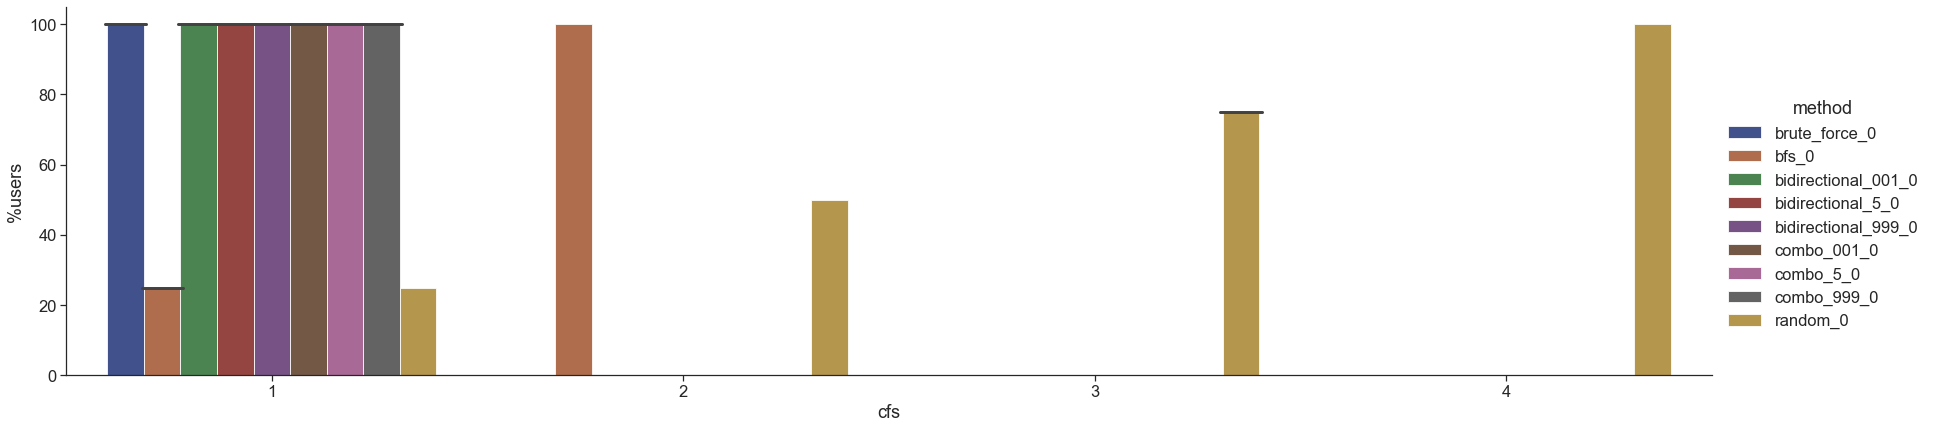

In [12]:
a4_dims = (11.7, 8.27)

g = sns.catplot(
    data=ddf[(ddf['pos'] == 13)],  # Filter data for a specific position
    kind="bar",  # Type of plot
    x="cfs",  # X-axis variable
    y="%users",  # Y-axis variable
    hue="method",  # Variable for color differentiation
    ci="sd",  # Confidence interval for error bars
    capsize=0.1,  # Size of the caps on error bars
    palette="dark",  # Color palette to use
    alpha=.8,  # Transparency of bars
    height=6,  # Height of the plot
    aspect=4,  # Aspect ratio of the plot
)

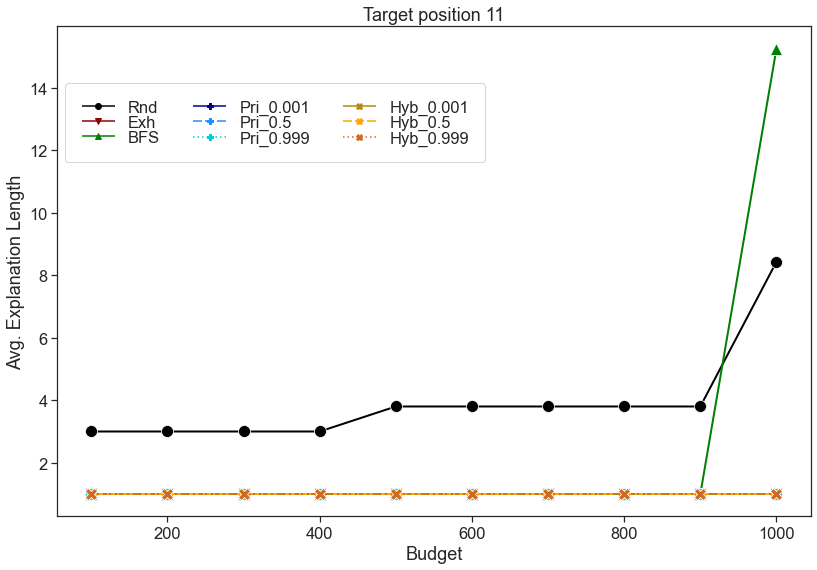

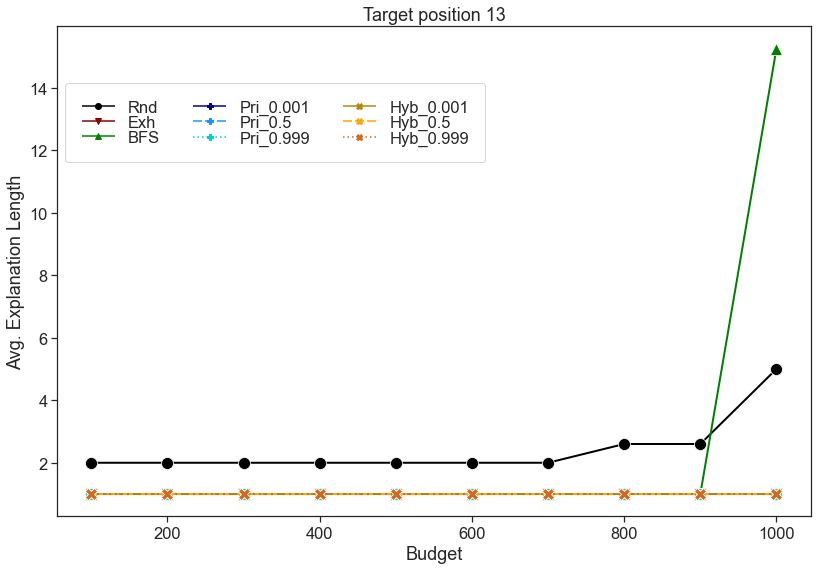

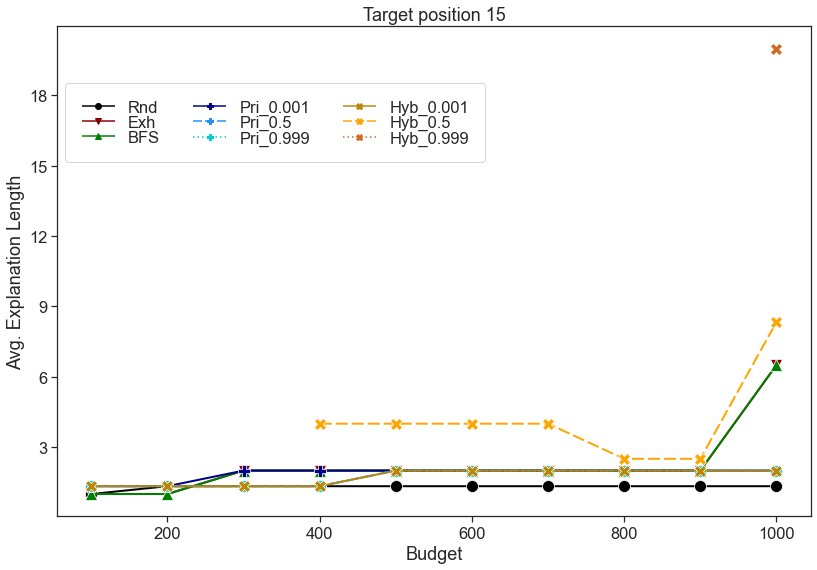

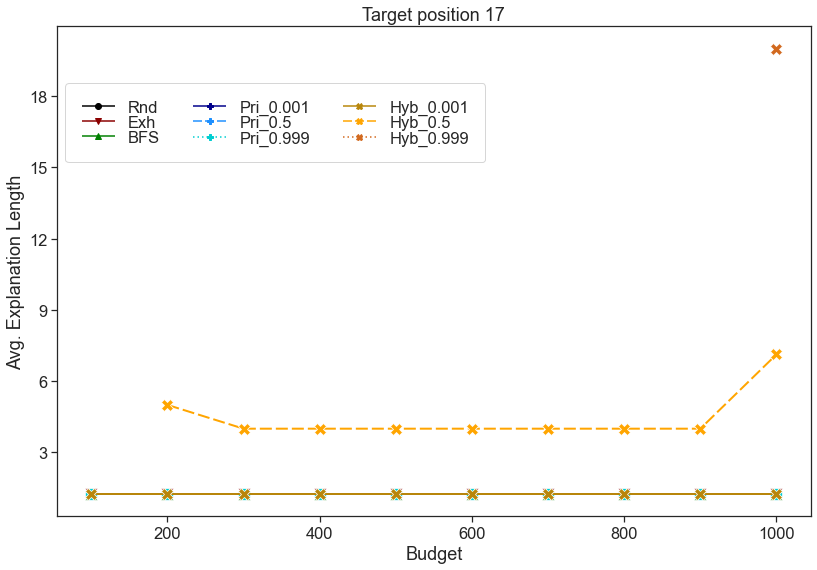

In [13]:
# Loop through each position and create individual line plots
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="card_mean", hue="method", style='method',
        palette=custom_palette,
        markers=custom_markers[:len(ddf2['method'].unique())], markersize=12, lw=2, ls='solid', dashes=custom_dashes[:len(ddf2['method'].unique())]
    )

    # Set the y-axis to logarithmic scale
    # g.set(yscale='log')

    # Set formatting for y-axis labels
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))

    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='upper left', bbox_to_anchor=(0, 0.9), ncol=3)

    # Replace legend labels with new labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set labels for x-axis and y-axis, and title for the plot
    ax.set(xlabel="Budget", ylabel="Avg. Explanation Length")
    ax.set_title(f'Target position {p}')

    # Adjust layout and save the plot as a PDF file
    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"avg_card_to_thres_pos_{p}.pdf"), dpi=300)

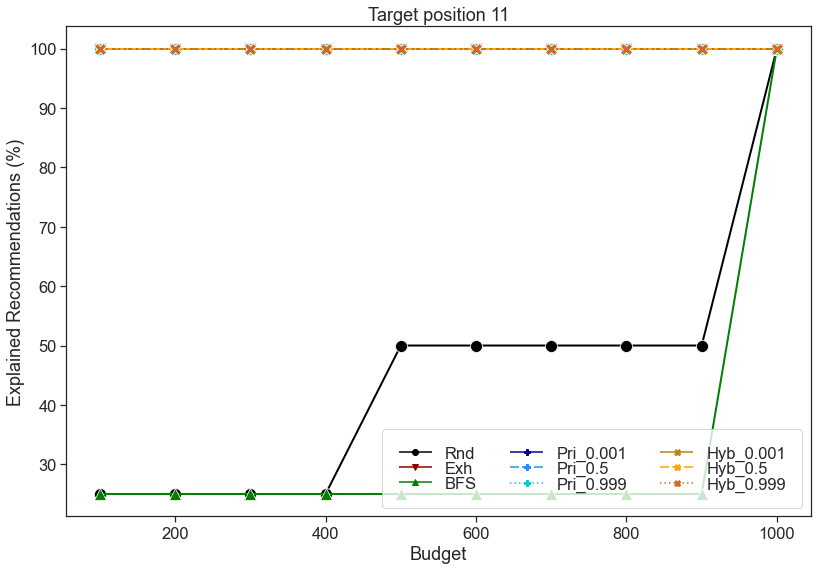

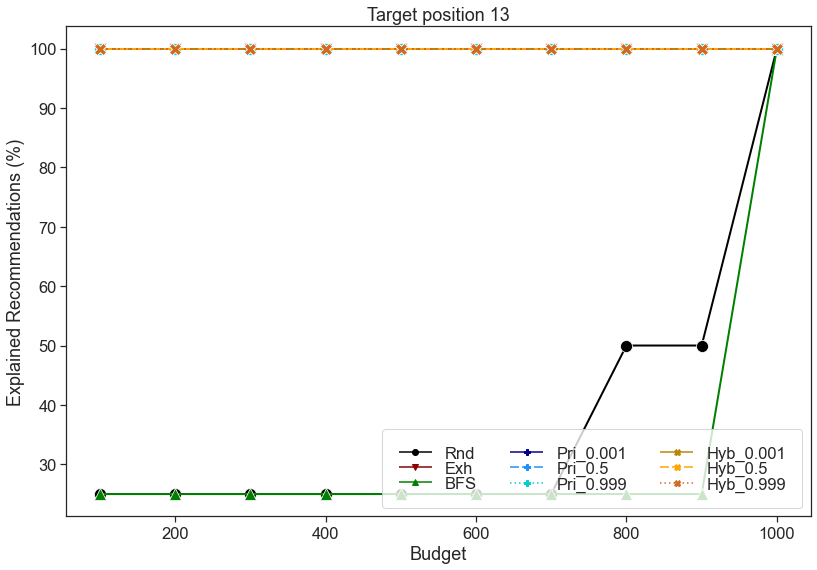

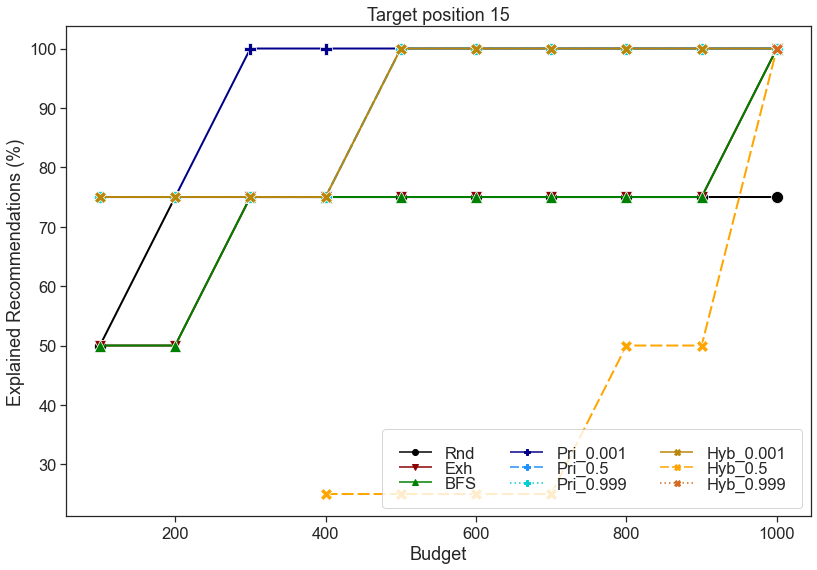

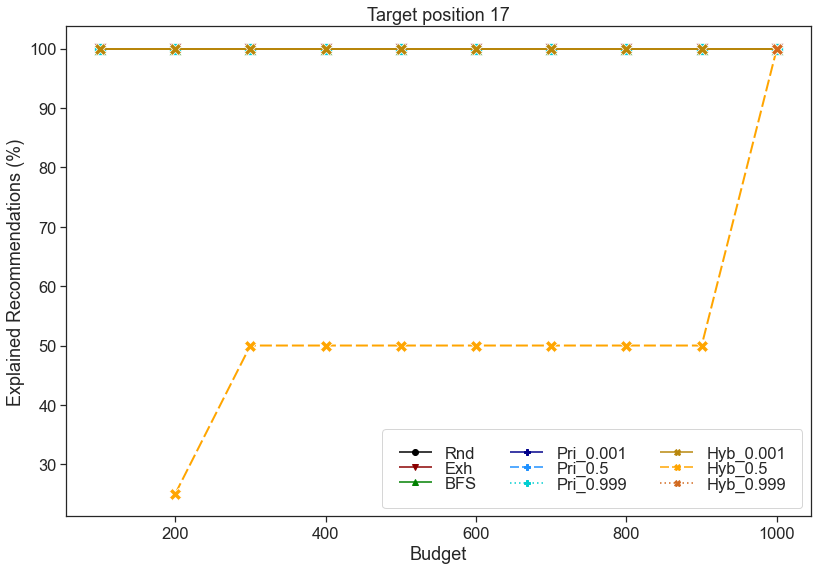

In [14]:
# Loop through target positions and create line plots for the percentage of users against budget thresholds

# Iterate over target positions and their corresponding groups in the DataFrame
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2,
    )

    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3)

    # Replace legend labels with new labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set axis labels and title
    ax.set(xlabel="Budget", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    # Adjust layout for better visualization
    fig.tight_layout()

    # Save the plot as a PDF file in the specified plots folder
    plt.savefig(os.path.join(plots_folder, f"users_percent_to_thres_pos_{p}.pdf"), dpi=300)

In [15]:
# Step 1: Print unique methods and custom markers side by side
unique_methods = ddf3['method'].unique()
print("Methods:", unique_methods)
print("Custom Markers:", custom_markers)

# Step 2: Create a mapping of methods to markers
method_marker_mapping = list(zip(unique_methods, custom_markers))
print("Method to Marker Mapping:", method_marker_mapping)


Methods: ['random_0' 'brute_force_0' 'bfs_0' 'bidirectional_001_0'
 'bidirectional_5_0' 'bidirectional_999_0' 'combo_001_0' 'combo_5_0'
 'combo_999_0']
Custom Markers: ['o', 'v', '^', 'P', 'P', 'P', 'X', 'X', 'X']
Method to Marker Mapping: [('random_0', 'o'), ('brute_force_0', 'v'), ('bfs_0', '^'), ('bidirectional_001_0', 'P'), ('bidirectional_5_0', 'P'), ('bidirectional_999_0', 'P'), ('combo_001_0', 'X'), ('combo_5_0', 'X'), ('combo_999_0', 'X')]


In [16]:
custom_markers = ['o', 'v', '^', 'P', 'P', 'P', 'X', 'X', 'X']
custom_dashes = [(1, 0), (4, 0), (4, 0), (4, 0), (6, 2), (1, 2), (1, 0), (6, 2), (1, 2)]

ValueError: The `markers` argument has the wrong number of values

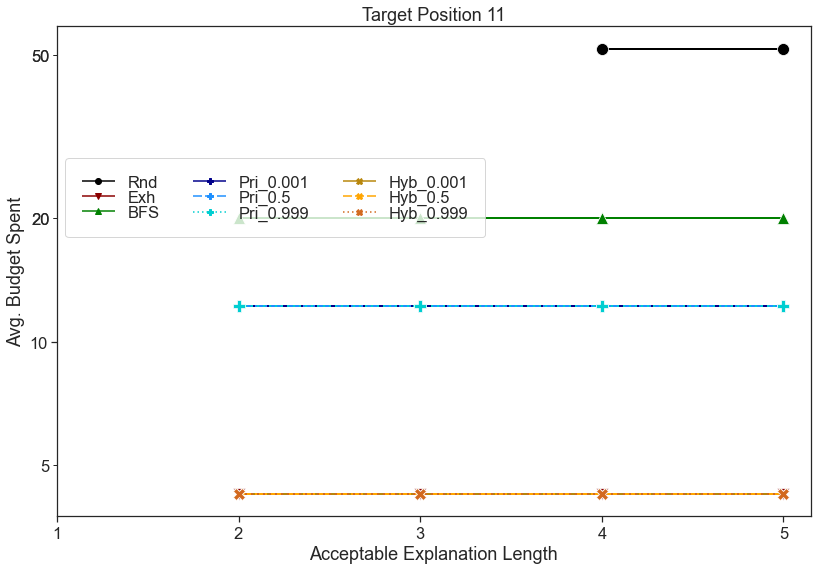

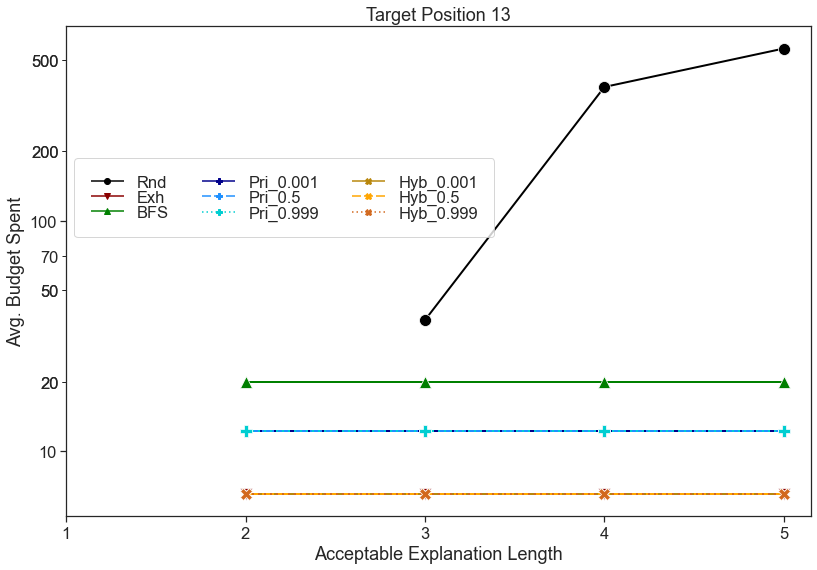

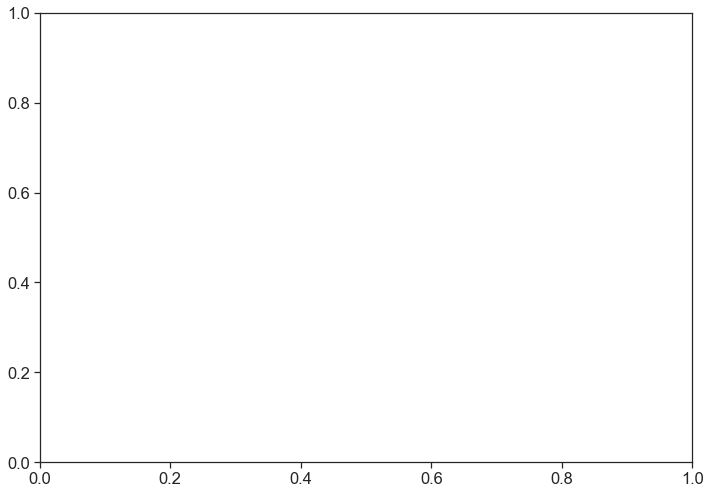

In [17]:
# Loop through target positions and create line plots for average budget spent against acceptable explanation length

# Iterate over target positions and their corresponding groups in the DataFrame
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf3[(ddf3['pos']==p)],
        x="cardinality", y="avg_budget", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )

    # Set y-axis scale to logarithmic
    g.set(yscale='log')

    # Set minor locator and formatter for y-axis
    locmin = mticker.LogLocator(base=10, subs=[10, 20, 50, 100, 200, 500, 700], numticks=12)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))

    # Set x-axis ticks
    ax.set_xticks(np.arange(1, 6, 1))

    # Uncomment the following line to add grid lines
    # plt.grid(True, which="both", ls="--", c='gray')

    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='center left', bbox_to_anchor=(0, 0.65), ncol=3)

    # Replace legend labels with new labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set axis labels and title
    ax.set(xlabel="Acceptable Explanation Length", ylabel="Avg. Budget Spent")
    ax.set_title(f'Target Position {p}')

    # Adjust layout for better visualization
    fig.tight_layout()

    # Save the plot as a PDF file in the specified plots folder
    plt.savefig(os.path.join(plots_folder, f"avg_budget_to_card_pos_{p}.pdf"), dpi=300)

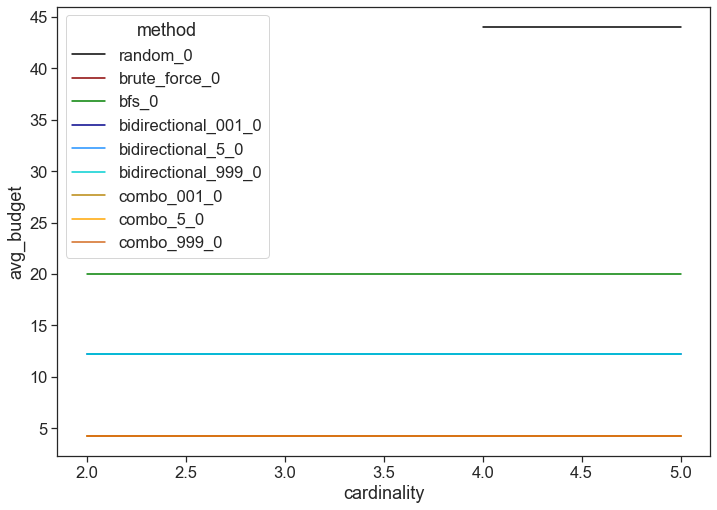

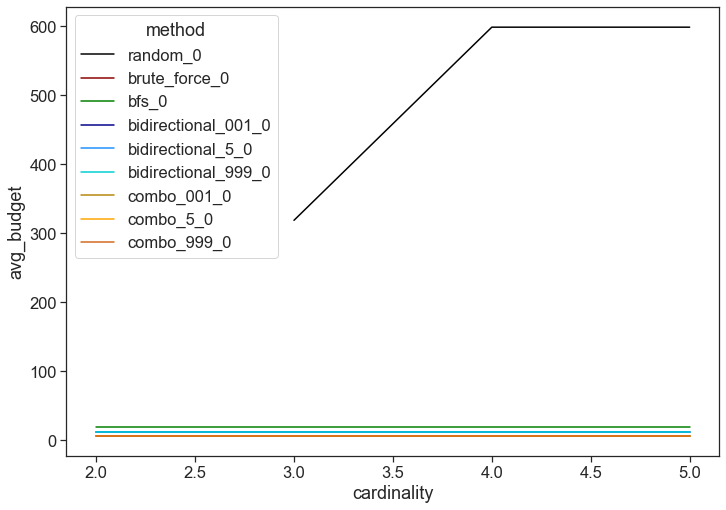

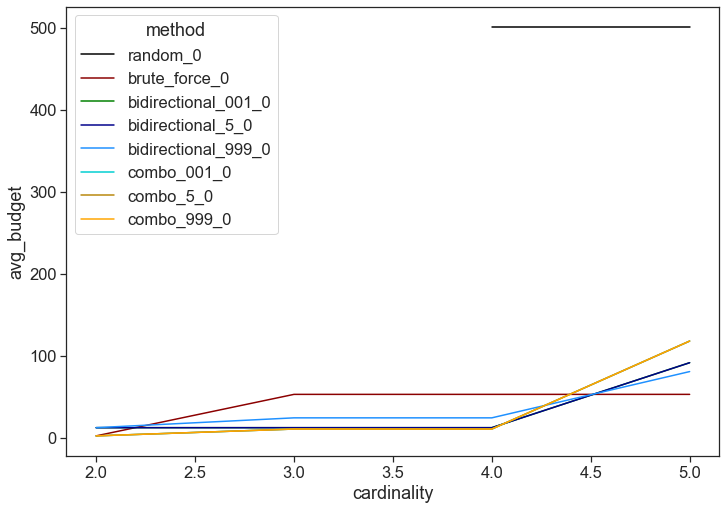

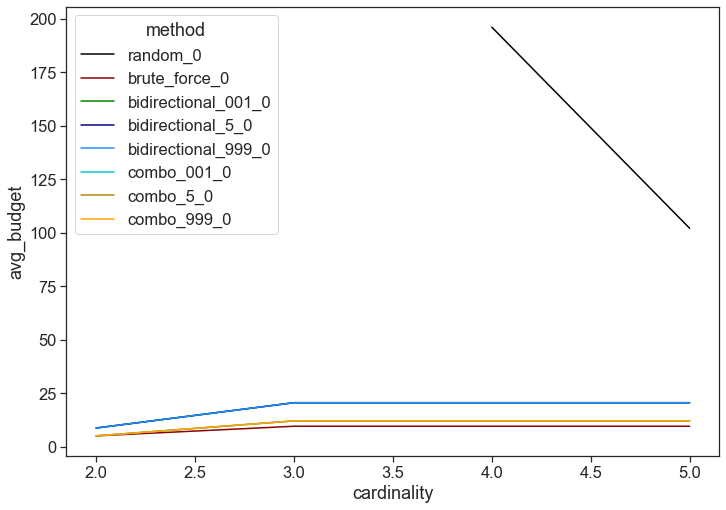

In [15]:
for p in ddf3['pos'].unique():
    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    sns.lineplot(ax=ax, data=ddf3[ddf3['pos']==p], x="cardinality", y="avg_budget", hue="method")
    plt.show()


ValueError: The `markers` argument has the wrong number of values

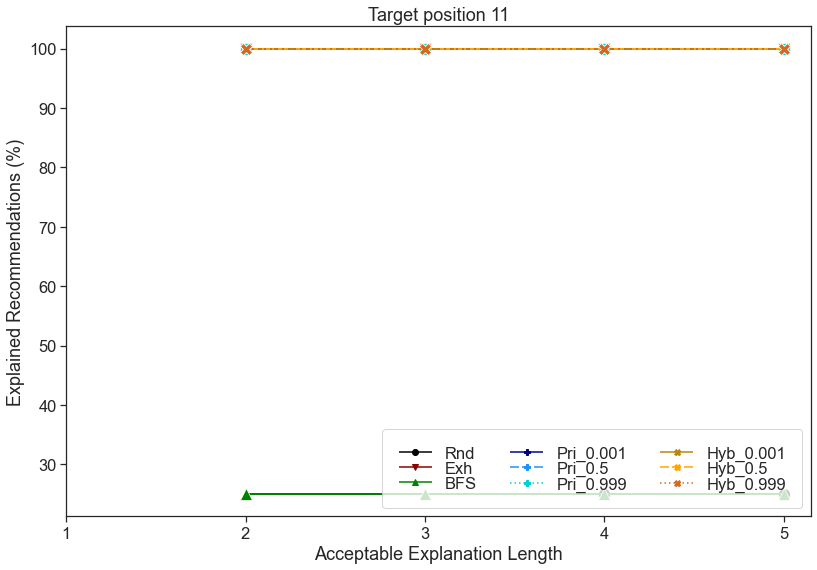

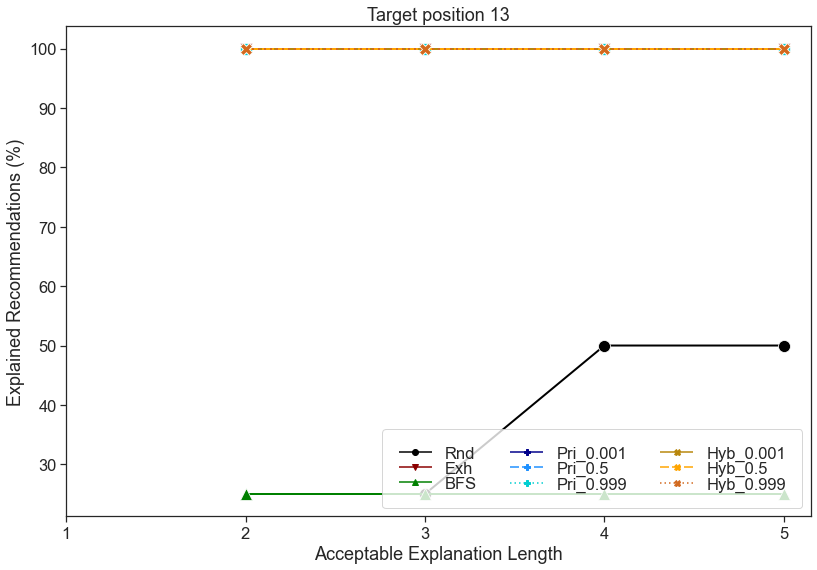

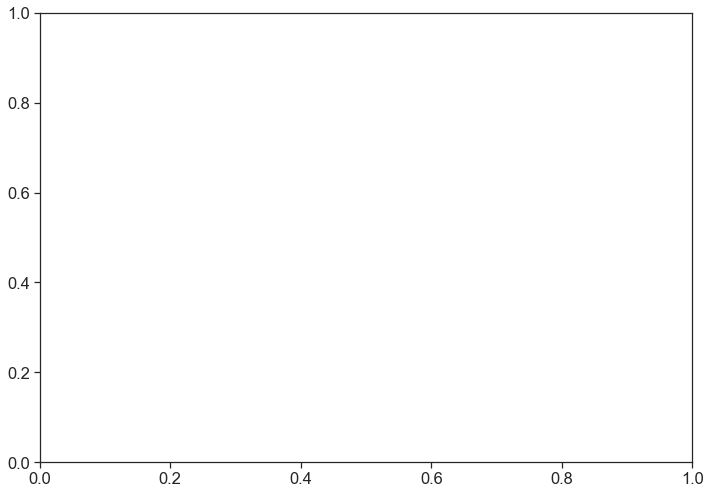

In [16]:
# Iterate over target positions and create line plots for percentage of users against acceptable explanation length

# Iterate over target positions and their corresponding groups in the DataFrame
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(ax=ax,
        data=ddf3[(ddf3['pos']==p) ],
        x="cardinality", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )

    ax.set_xticks(np.arange(1, 6, 1))


    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3)

    # Replace legend labels with new labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set axis labels and title
    ax.set(xlabel="Acceptable Explanation Length", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    # Adjust layout for better visualization
    fig.tight_layout()

    # Save the plot as a PDF file in the specified plots folder
    plt.savefig(os.path.join(plots_folder, f"users_percent_to_card_pos_{p}.pdf"), dpi=300)

# Amazon

## Load data

In [ ]:
## uncomment the following lines if you want to run the various strategies in budget_strategies
# implemented_strategies = os.path.join(base_dir, 'budget_strategies.ipynb')
# %run $implemented_strategies

%store -r amazon_random_cfs
%store -r amazon_brute_force_cfs

%store -r amazon_bfs_yloss_cfs
# %store -r dfs_yloss_cfs
# %store -r bestfs_yloss_cfs

%store -r amazon_bidirectional_cfs
%store -r amazon_combo_cfs

## Prepare data

In [ ]:
from collections import Counter


# cnt = dict.fromkeys(most_sim_cfs.keys())
# no_target_achieved_cases = dict.fromkeys(most_sim_cfs.keys())
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)
strs_prefix = 'amazon_'

for i in range(1):
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[0]}_cfs')[i],
        cnt, no_target_achieved_cases, f'random_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[1]}_cfs')[i],
        cnt, no_target_achieved_cases, f'brute_force_{i}')

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[2]}_cfs')[i],
        cnt, no_target_achieved_cases, f'bfs_{i}')

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i],
        cnt, no_target_achieved_cases, f'bidirectional_001_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'bidirectional_5_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i + 2],
        cnt, no_target_achieved_cases, f'bidirectional_999_{i}')

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i],
        cnt, no_target_achieved_cases, f'combo_001_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'combo_5_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i + 2],
        cnt, no_target_achieved_cases, f'combo_999_{i}')

In [ ]:
methods_supported = ['Brute_Force', 'Random', 'BFS'] + \
    [f'BiDirectional_{m}' for m in ['001', '5', '999']] + \
    [f'Combo_{m}' for m in ['001', '5', '999']]

strategies = [('init', 2), ('best', 3)]
custom_range = [9, 29]
target_pos = list(cnt.keys())
cnames = ['user_id', 'method', 'pos', 'budget', 'init_budget', 'best_budget', 'cardinality', 'cfs_orig', 'cfs']

rows, cols = 5, 1

tmp_dfs = []
for col in range(cols):
    for pos, row in zip(target_pos, range(rows)):

        tmp_dfs.append(pd.DataFrame.from_records(list(
            itertools.chain(*(
                zip(v[6], itertools.repeat(k), itertools.repeat(pos), v[i], v[2], v[3],
                    itertools.repeat(i - custom_range[0] + 1), v[7], v[8])
                for k, v in cnt[pos].items() if f'_{col}' in k and k.rsplit('_', 1)[0] in map(lambda x: x.lower(), methods_supported)
                for i in range(custom_range[0], custom_range[1])
            ))), columns=cnames
        ))

df = pd.concat(tmp_dfs, ignore_index=True)

In [ ]:
idx = df.loc[(df['cfs_orig'] == df['cfs'])].duplicated(subset=['user_id', 'method', 'pos'], keep='last')
df.loc[(df['cfs_orig'] == df['cfs']) & ~idx, ['budget']] = df.loc[(df['cfs_orig'] == df['cfs']) & ~idx]['best_budget']

In [ ]:
# # 1st plot: %users per card
all_users = df['user_id'].nunique()

res = []
for i in range(1, 21):
    res.append(df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]
               .groupby(['method', 'pos'], sort=False)[['user_id', 'cfs']]
               .nunique()
               .reset_index())

ddf = pd.concat(res, ignore_index=True)
ddf['%users'] = (ddf['user_id'] / all_users) * 100

# 2nd plot: average budget
max_card = 5
init = 100
end = 1001
step = 100


res = []
for b in range(init, end, step):
    aggregated = df[(df['budget'] > 0) & (df['best_budget'] <= b)]\
        .groupby(['method', 'pos'], sort=False)\
        .agg(card_mean=('cfs', 'mean'), no_users=('user_id', 'nunique'))\
        .reset_index()
    aggregated['budget_thres'] = b
    aggregated['max_users'] = aggregated.groupby(['pos'])['no_users'].transform(max)
    res.append(aggregated)

ddf2 = pd.concat(res, ignore_index=True)
ddf2['%users'] = (ddf2['no_users'] / all_users) * 100
# ddf2['combined_means'] = ((ddf2['card_mean'] * ddf2['no_users']) + (20 * (ddf2['max_users'] - ddf2['no_users']))) / (ddf2['max_users'])
ddf2['combined_means'] = ddf2['card_mean']


# 3rd plot:
def aggf(data):
    users_grouping = data.groupby(['user_id']).apply(
        lambda d: d.loc[d['budget'] == d['budget'].max()]
    )

    return pd.Series(
        [users_grouping['budget'].mean(),
         users_grouping['user_id'].count()],
        ['avg_budget', 'no_users']
    )

res = []
for i in range(5, 0, -1):
    aggregated = df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]\
        .groupby(['method', 'pos'], sort=False)\
        .apply(aggf)\
        .reset_index()
    aggregated['cardinality'] = i
    res.append(aggregated)

ddf3 = pd.concat(res, ignore_index=True)
ddf3['%users'] = (ddf3['no_users'] / all_users) * 100

## Plots

In [ ]:
import matplotlib.ticker as mticker


sns.set_theme(style="ticks", font_scale=1.5, )

# Create an array with the colors you want to use
# colors = ["#FF0B04", "#4374B3", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors = ['black', 'darkred', 'green', 'darkblue', 'dodgerblue', 'darkturquoise', 'darkgoldenrod', 'orange', 'chocolate']

# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))

# custom_markers = ['o', 'v', '^', 's', 'P', 'X', '<', '>', 'D', ]
custom_markers = ['o', 'v', '^', 'P', 'P', 'P', 'X', 'X', 'X']
custom_dashes = [(1, 0), (4, 0), (4, 0), (4, 0), (6, 2), (1, 2), (1, 0), (6, 2), (1, 2)]

In [ ]:
# Draw a nested barplot by species and sex
# g = sns.catplot(
#     data=ddf2[ddf2['pos']==3], kind="bar",
#     x="budget_thres", y='combined_means', hue="method",
#     ci=None, palette="dark", alpha=.8, height=6, aspect=4,
# )

# num_locations = len(ddf2.groupby('budget_thres').groups.keys())
# hatches = itertools.cycle(['//', '+', '-', 'x', '\\', '*', 'o', '.'])
# for i, bar in enumerate(g.ax.patches):
#     if i % num_locations == 0:
#         hatch = next(hatches)
#     bar.set_hatch(hatch)

# g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=False)

# g.despine(left=True)
# g.set_axis_labels("threshold", "cardinality average")
# g.legend.set_title("")

rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="card_mean", hue="method", style='method',
        palette=custom_palette,
        markers=custom_markers, markersize=12, lw=2, ls='solid', dashes=custom_dashes
    )

    g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#     ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
#     ax.yaxis.get_major_formatter().set_scientific(False)
#     ax.yaxis.get_major_formatter().set_useOffset(False)

    # Turns on grid on the Axis.
#     plt.grid(True, which="both", ls="--", c='gray')
#     scientific_formatter = mticker.FuncFormatter()
#     ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='upper left', bbox_to_anchor=(0, 0.9), ncol=3,)

    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Budget", ylabel="Avg. Explanation Length")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}avg_card_to_thres_pos_{p}.pdf"), dpi=300)

In [ ]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2,
    )

#     g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3,)

    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Budget", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}users_percent_to_thres_pos_{p}.pdf"), dpi=300)

In [ ]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf3[(ddf3['pos']==p)],
        x="cardinality", y="avg_budget", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )
    g.set(yscale='log')
    locmin = mticker.LogLocator(base=10, subs=[10, 20, 50, 100, 200, 500, 700], numticks=12)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

    ax.set_xticks(np.arange(1, 6, 1))

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='center left', bbox_to_anchor=(0, 0.65), ncol=3,)
    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Acceptable Explanation Length", ylabel="Avg. Budget Spent")
    ax.set_title(f'Target Position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}avg_budget_to_card_pos_{p}.pdf"), dpi=300)

In [ ]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(ax=ax,
        data=ddf3[(ddf3['pos']==p) ],
        x="cardinality", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )

#     g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

    ax.set_xticks(np.arange(1, 6, 1))

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3,)
    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Acceptable Explanation Length", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}users_percent_to_card_pos_{p}.pdf"), dpi=300)